In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

# Базовые принципы машинного обучения

<center>Pavel Nesterov</center>
<center>http://pavelnesterov.info/</center>

## Оглавление

1. Линейная регрессия
* Линейная регрессия в Sklearn
* Байесовый взгляд на линейную регрессию
* Логистическая регрессия

# Машинное обучение

![mlvd](images/Data_Science_VD.png)

![mlvd](images/bengio.png)

* Машинное обучение — это подраздел искусственного интеллекта, в котором изучаются алгоритмы, способные обучаться без прямого программирования того, что нужно изучать.
* *Что значит обучается?*
    * Говорят, что программа обучается на опыте **E** относительно класса задач **T** в смысле меры качества **L**, если при решении задачи **T** качество, измеряемое мерой **L**, возрастает при демонстрации нового опыта **E**.

# Типы задач машинного обучения

## Основные задачи
* *Обучение с учителем* - задача вывода функции $f: X \rightarrow Y$ по заданному размеченному множеству данных; каждый пример является парой вектора признаков объекта и желаемого отклика на него $D = \left\{ \left( x_i, y_i \right) \right\}_{i=1, \ldots, n}$, например целевая переменная может быть:
    * категориальной - задача классификации;
    * непрерывной - задача регрессии;
    * порядковой - задача ранжирования.
        
* *Обучение без учителя* - задача вывода функции, описывающей внутреннюю структуру неразмеченных данных $D = \left\{ x_i \right\}_{i=1, \ldots, n}$
    * кластеризация - задача выявления скрытых групп внутри данных;
    * сжатие размерности - задача уменьшения количества признаков;
    * заполнения пропусков в матрице - задача рекомендаций;
    * частичное обучение - задача обучения с учителем, при условии неограниченного доступа к неразмеченным данным и крайне ограниченным набором размеченных.

* *Обучение с подкреплением* - задача обучения агента принимать оптимальные решения при взаимодействии с окружающей средой;
    * в отличие от обучения с учителем, агент может влиять не только на себя (изменение своих параметров), но и изменять окружение (набор данных не фиксирован, можно например ограбить караван).

## Другие задачи
* *Трансфер знаний* - применение модели обученное для решения одной задачи при решении другой задачи;
* *активное обучение* - задача построения оптимального дизайна эксперимента, когда есть доступ к размеченным и неразмеченным данным, и требуется решить другую задачу машинного обучения, потратив как можно меньше запросов к данным;
* *Онлайн обучение* - потоковое обучение моделей машинного обучения;
* *Мета-обучение* или *обучение обучению*.

# Предиктивная модель

*Предиктивная модель* - это параметрическое семейство функций (гипотез):

$$\large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* где
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - множество параметров

# Алгоритм обучения

*Алгоритм обучения* - это отображение из множества данных в множество гипотез:

$$\large \mathcal{M}: \left(X \times Y\right)^n \rightarrow \mathcal{H}$$

Обычно выделяют два шага при решении задачи обучения с учителем:
1. Обучение, когда выбирается гипотеза: $\large h = \mathcal{M}\left(D\right)$
* Тестирование, когда для заданного примера $\large x$ вычисляется выход модели $\large \hat{y} = h\left(x\right)$

# Минимизация эмпирического риска
*Минимизация эмпирического риска* - это принцип в статистической теории обучения для решения широкого круга задач, включая обучение с учителем, в частности задачи классификации и регрессии.

Введем вещественнозначную функцию (функцию ошибки):
$$\large L: Y \times Y \rightarrow \mathbb{R}$$
с помощью которой будем измерять на сколько отличается прогноз $\large \hat {y}$ от истинного значения целевой переменной $\large y$.

Риском гипотезы $\large h$ будем называть ожидаемое значение функции ошибки по распределению примеров:
$$\large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\
&=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right)
\end{array}$$

К сожалению совместная плотность $\large P\left(x, y\right)$ неизвестна (иначе бы не было и задачи). Но мы можем вычислить аппроксимацию выражения выше как среднее значение функции стоимости по выборке (эмпирический риск):

$$\large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$$

Согласно принципу мы должны выбрать ту гипотезу, которая минимизирует эмпирический риск:
$$\large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$$

Примеры функций стоимости:
* классификация: $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* регрессия: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$

# Обобщение

Главным недостатком принципа минимизации эмпирического риска является переобучение:

* мы говорим, что модель обладает *обобщающей способностью* если вероятность ошибки на тестовом множестве данных (такое множество примеров, которое не участвовало в обучении ни в каком виде) мала или прогнозируема;
* *переобучение* провляется в том, что модель показывает хорошие результаты на обучающем множестве и плохие на тестовом. Такие модели не обладают обобщающей способностью.

# Линейная регрессия

Ограничим пространство гипотез множеством линейных функций от аргумента размерности $\large \left(m + 1\right)$, смещение и один параметр на каждый признак ($\large x_0 = 1$):

$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
где:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Тогда эмпирический риск принимает вид среднеквадратичной ошибки:
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
где:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ это $\large n \times m$ матрица, где каждая строка это вектор признаков.

Выведем алгоритм обучения. Воспользуемся тем фактом, что функция стоимости (эмпирический риск) является выпуклой, что позволит нам найти глобальный оптимум:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

Такое решение называется методом наименьших квадратов:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

МНК решение обладает интересными свойствами, которые можно найти в теореме <a href="https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem">Гаусса-Маркова</a>.

In [2]:
# plot graphics in the notebook 
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# set style
sns.set_style("dark")
# main library for plotting
import matplotlib.pyplot as plt
# set default size of plots
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
plt.rcParams['figure.figsize'] = 12, 8

In [4]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

Shape of X is (25,)
Head of X is [ 0.48428956  0.57234221  0.66039485  0.74215802  0.81134225  1.30821075
  1.67928977  1.79250031  1.98118456  2.2453425 ]


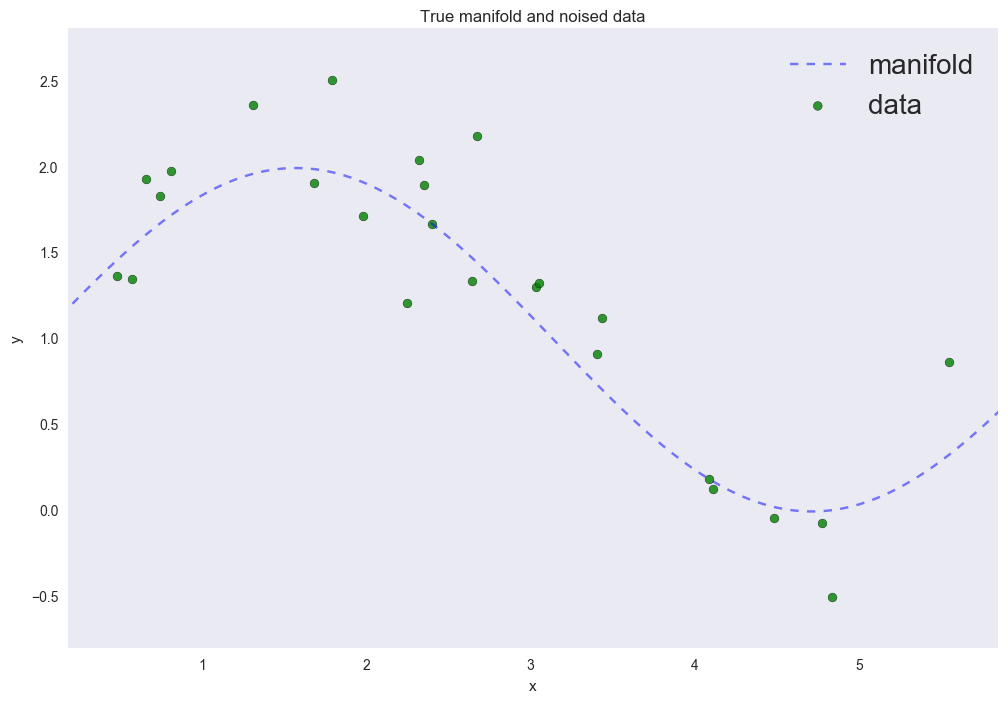

In [5]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)

print 'Shape of X is', data['x_train'].shape
print 'Head of X is', data['x_train'][:10]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Top rows of X
[[ 1.          0.48428956]
 [ 1.          0.57234221]
 [ 1.          0.66039485]
 [ 1.          0.74215802]
 [ 1.          0.81134225]]
Fitted params
[ 2.42648096 -0.42818065]


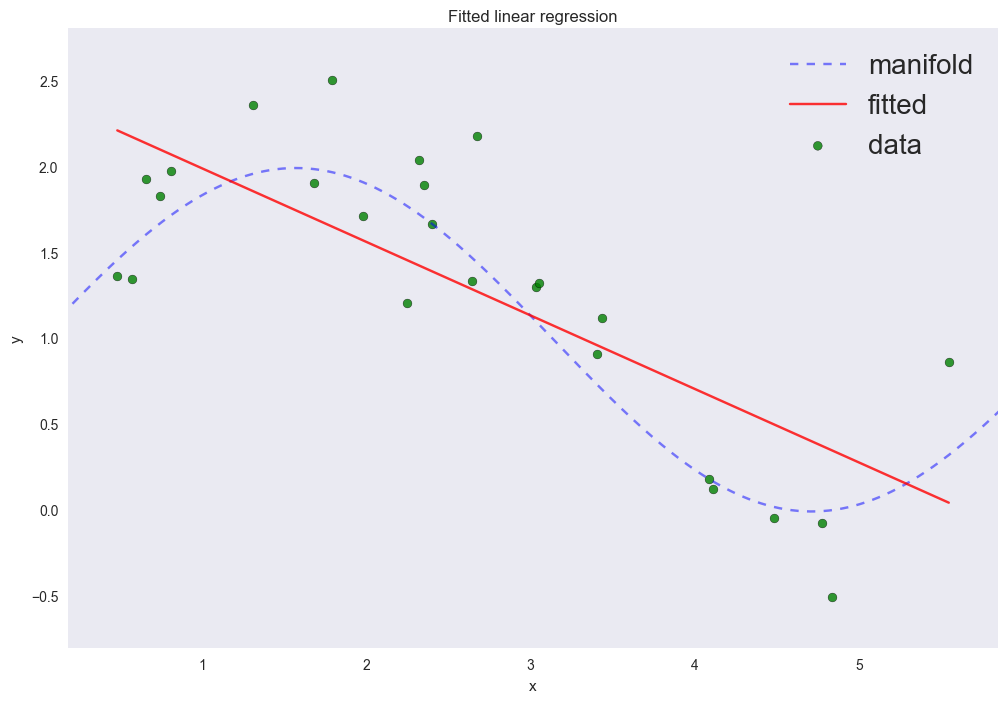

In [6]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print 'Top rows of X'
print X[:5, :]
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print 'Fitted params'
print w
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
np.mean((data['y_train'] - y_hat)**2)

0.26704367617359787

# Полиномиальная регрессия

Расширим множество гипотез до множества всех полиномов степени $\large p$. Для количества признаков $\large m = 1$ множество гипотез будет:
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

В остальном ничего не поменялось.

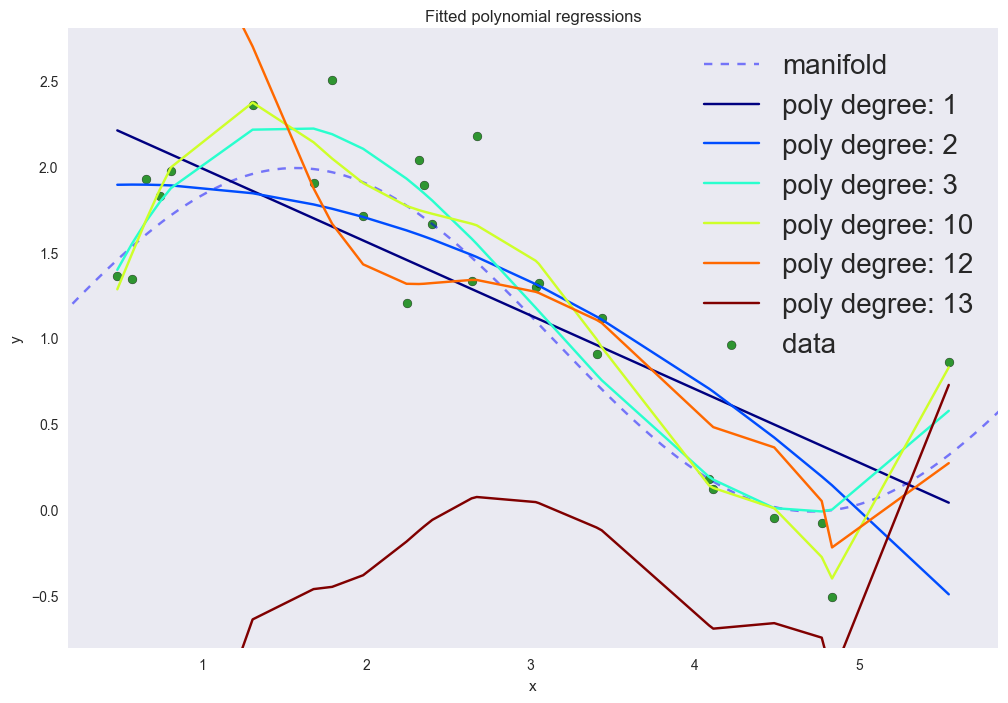

In [8]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [9]:
for p, e in zip(degree_list, err):
    print p, e

1 0.267043676174
2 0.224950975569
3 0.0821705159225
10 0.0532052588698
12 1.37040538202
13 5.76155044745


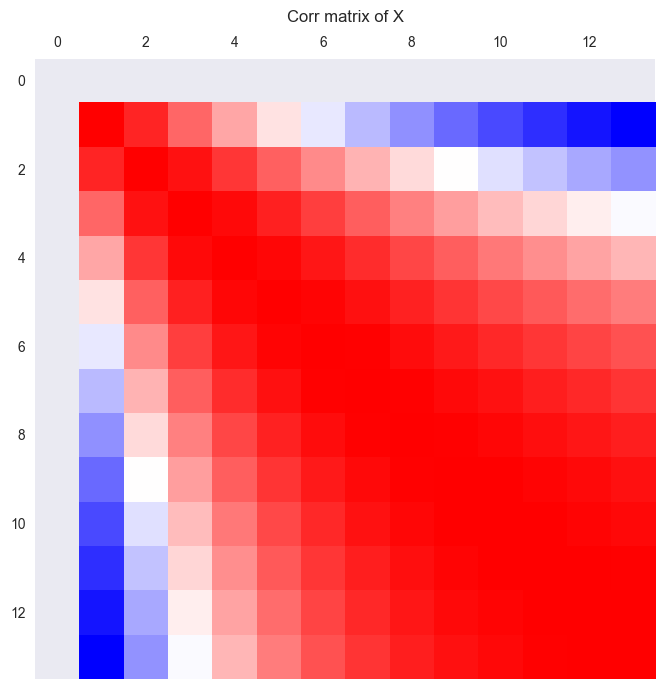

In [10]:
# Correlation matrix
plt.matshow(np.corrcoef(X.T), cmap=plt.cm.bwr)
plt.title('Corr matrix of X')
plt.show()

In [11]:
# eigenvalues for poly-12 features, we can see multicollinearity
np.linalg.eigvals(np.cov(X[:, 1:-1].T))

array([  3.05178721e+16,   1.79504813e+12,   3.12307508e+08,
         2.86789648e+05,   8.47983261e+02,   8.30337226e+00,
         1.56016912e-01,  -3.71188377e-03,   3.16221530e-03,
         1.26562837e-04,   3.16074810e-06,  -8.30262871e-08])

In [12]:
# eigenvalues for poly-13 features, we can see multicollinearity and complex eigenvalues
np.linalg.eigvals(np.cov(X[:, 1:].T))

array([  9.29965299e+17+0.j        ,   4.04567033e+13+0.j        ,
         5.44657111e+09+0.j        ,   3.54104756e+06+0.j        ,
         8.36745166e+03+0.j        ,   6.82745279e+01+0.j        ,
         8.88434986e-01+0.j        ,   2.42827315e-02+0.00830052j,
         2.42827315e-02-0.00830052j,   1.17621840e-03+0.j        ,
         1.72254789e-04+0.j        ,  -5.68384880e-06+0.j        ,
         2.39611454e-07+0.j        ])

Для тестирование на линейную зависимость или мультиколлинеарность можно исползовать число обусловленности матрицы $X^T X$. Число обусловленности равно отношению большего собственного числа к меньшему. Большое число определенности или наличие близких к нулю собственных чисел является признаком мультиколлинеарности.

К сожалению инвертирование $X^T X$ численно нестабильно, но существует решение. Вспомним, что любую полноранговую матрицу $X$ размера $n \times m$ можно представить в виде:
$$\Large X = QR$$
где
- $Q^T Q = E$
- $R$ треугольная матрица размера $m \times m$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(QR\right)^T \left(QR\right) \vec{w} = \left(QR\right)^T \vec{y} \\
&\Leftrightarrow& R^T \left(Q^T Q\right) R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& R^T R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& \left(R^T\right)^{-1} R^T R \vec{w} = \left(R^T\right)^{-1}  R^T Q^T \vec{y} \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(R\right)^{-1} Q^T \vec{y} \\
\end{array}$$

Треугольная матрица легко инвертируется, поэтому решение заметно стабильнее. Если бы нам был интересен только прогноз, то можно было бы и не выводить значения параметров модели:

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& Q R \vec{w} = Q Q^T \vec{y} \\
&\Leftrightarrow& X \vec{w} = Q Q^T \vec{y} \\
\end{array}$$

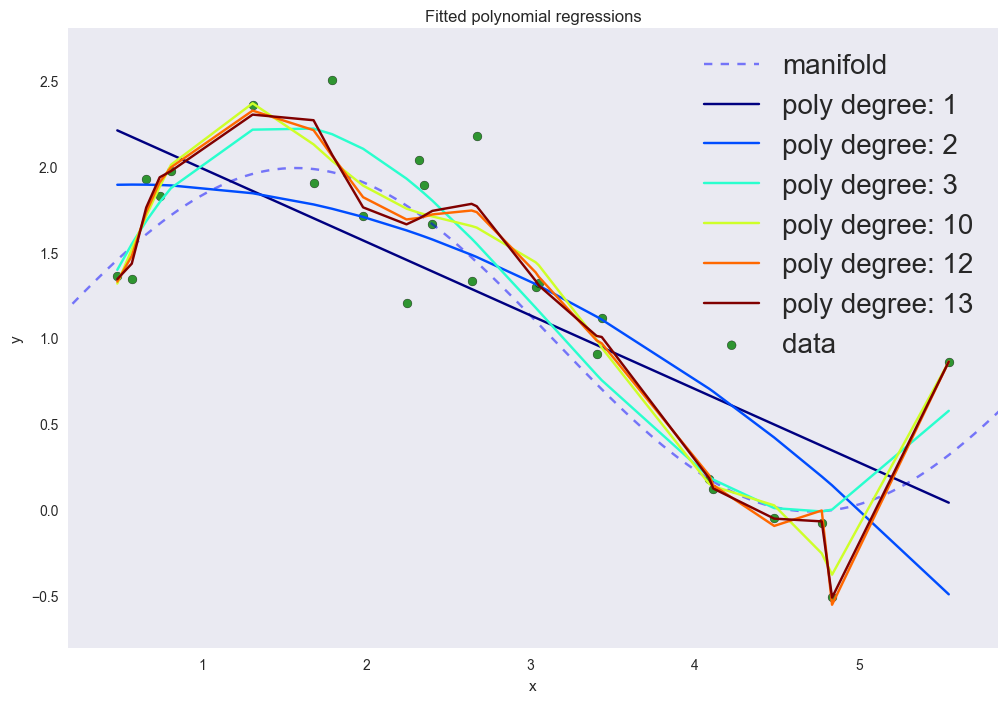

In [13]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

Посмотрим на значение параметров, которые получились в результате применения алгоритма обучения:

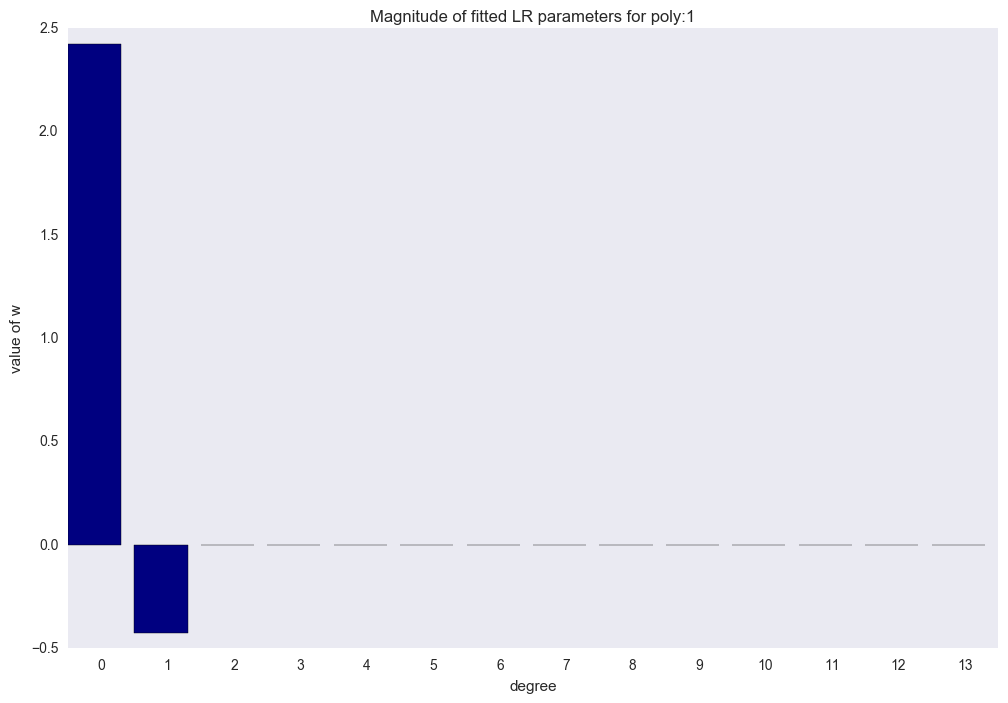

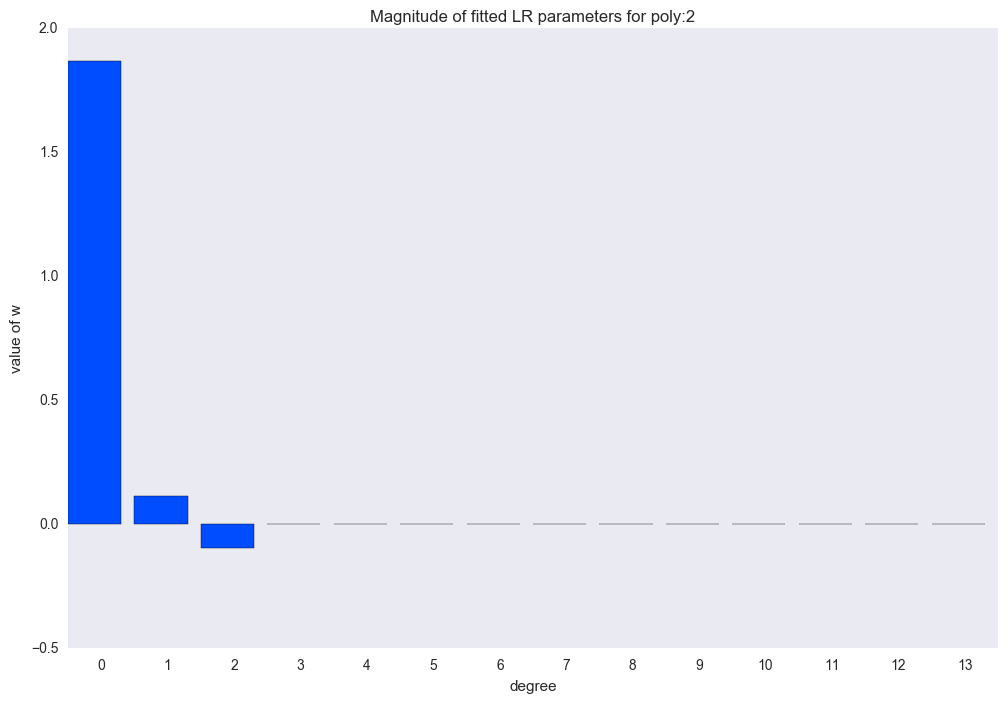

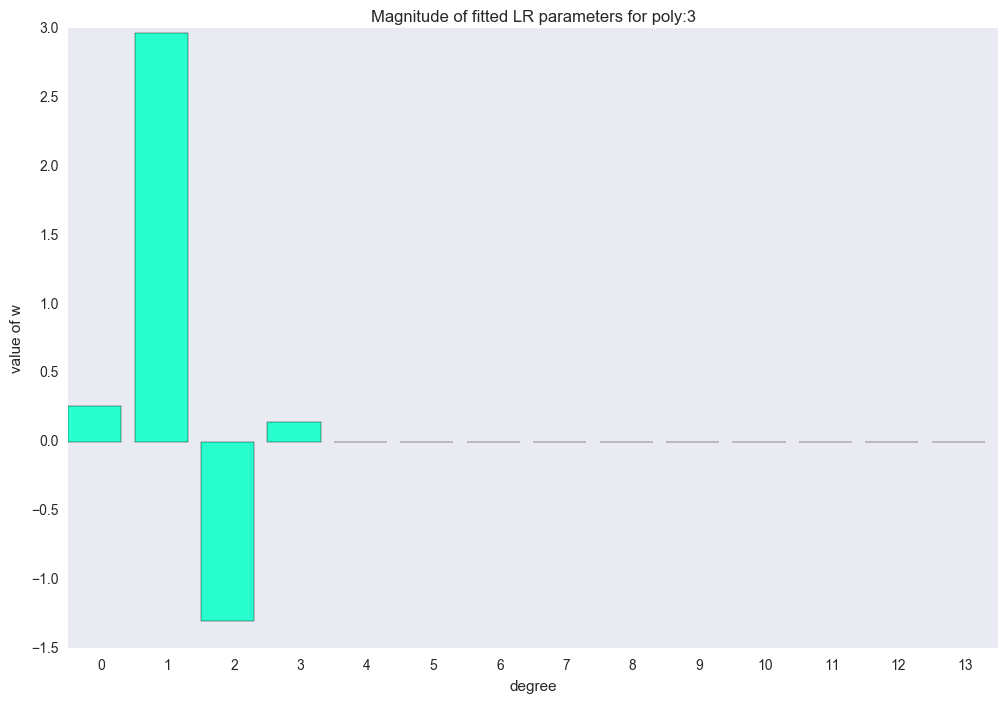

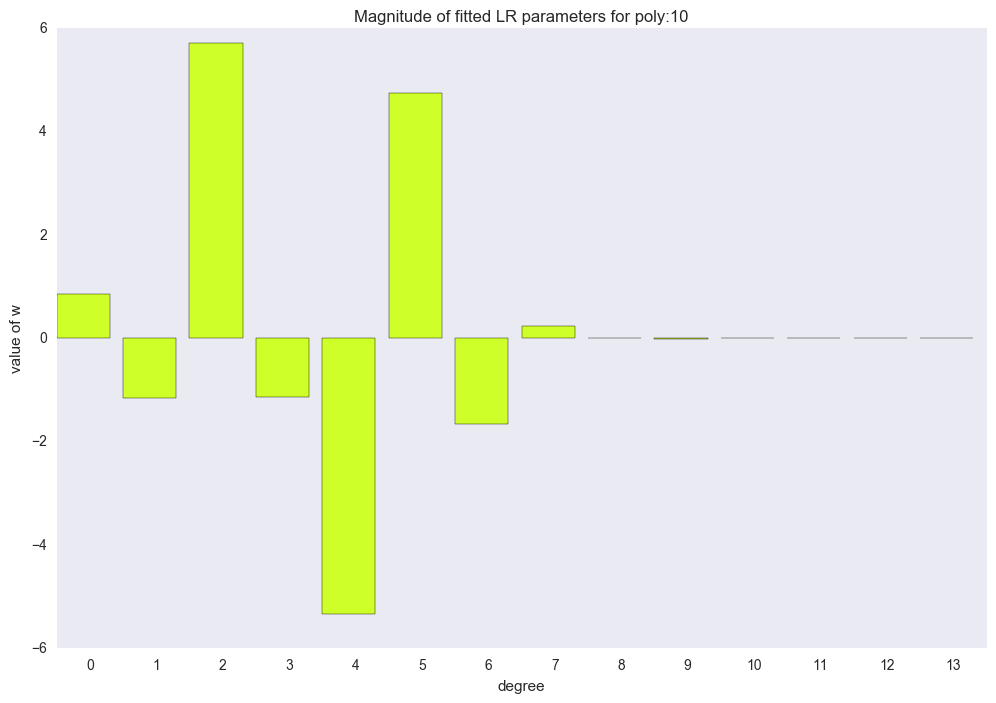

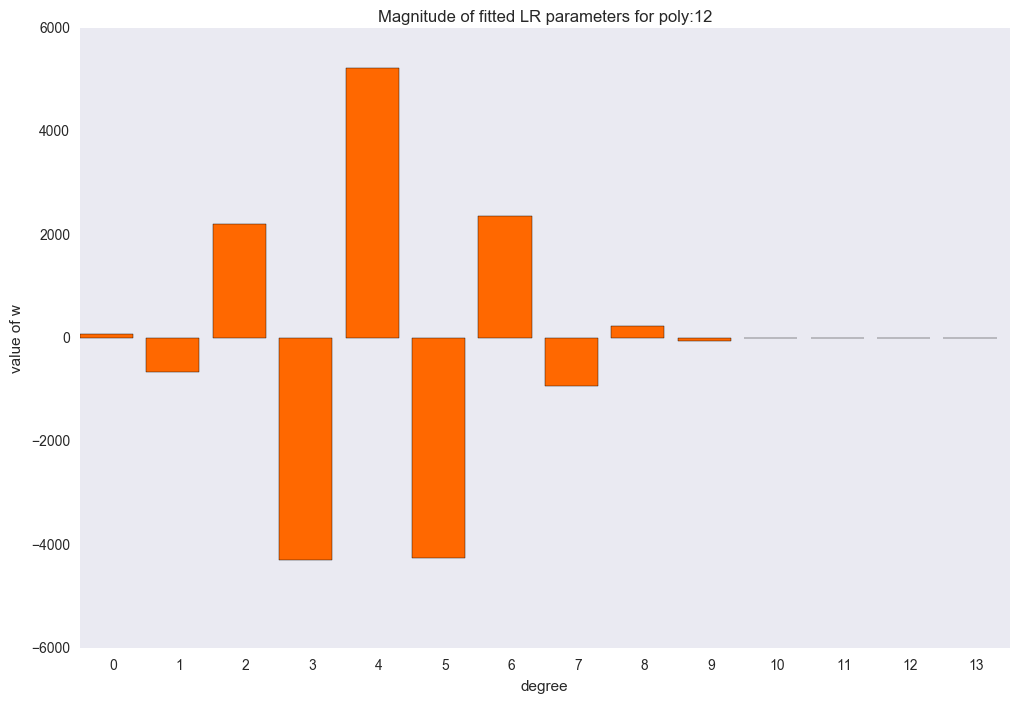

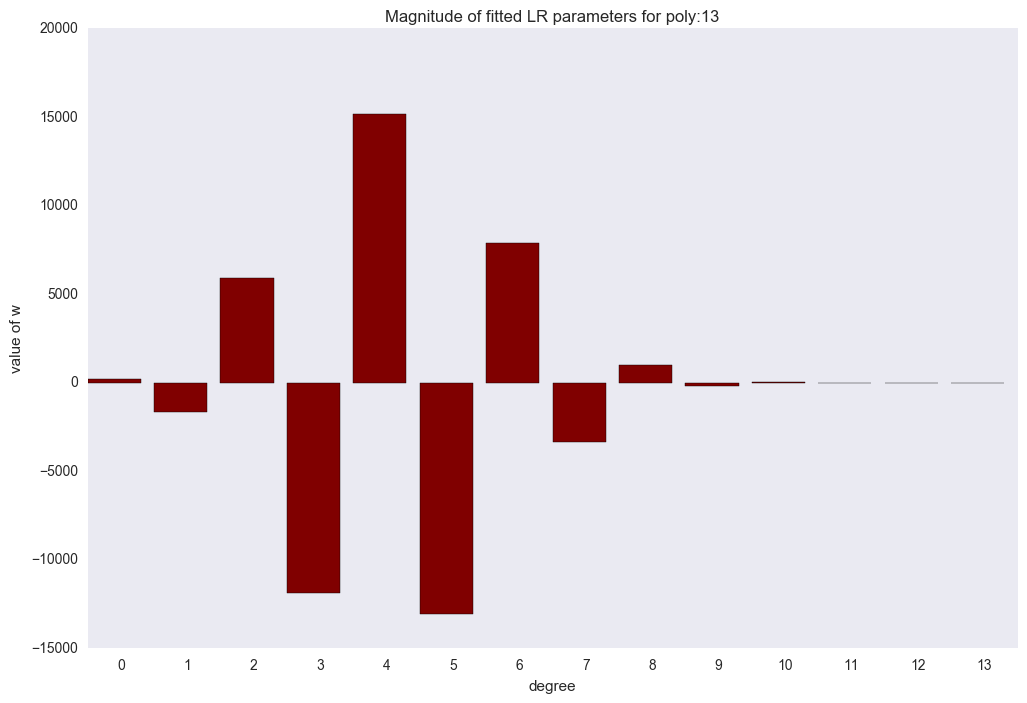

In [14]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# Регуляризация

Симптомы переобучения видны невооруженным взглядом: выученная функция интерполирует данные (старается пройти чуть ли не через каждую точку данных). Так же мы видим, что абсолютные значения весов растут вместе с увеличением степени полинома. Что если мы наложим какой-нибудь штраф на амплитуду весов? В общем случае штраф выглядит следующим образом:
$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
где:
* $\large \lambda$ - это параметр регуляризации.

# $L_2$ регуляризация

Попробуем добавить ограничение на $L_2$ норму вектора параметров модели:

$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$

тогда целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$

Как и раньше, продифференцируем по параметрам $\large \vec{w}$:
$$\large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$

и найдем решение:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

Такая регрессия называется гребневой регрессией (ridge regression). При увеличении параметра регуляризации, матрица $X^T X + \lambda E$ становится "менее сингулярной", т.е. **регулярной**, а задача становится более определенной. Для такой матрицы число обусловленности будет равно: $\frac{e_\text{max}+λ}{e_\text{min}+λ}, где $e_x$ — это собственные числа матрицы. Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности.

<img src="./images/l2reg.png" />

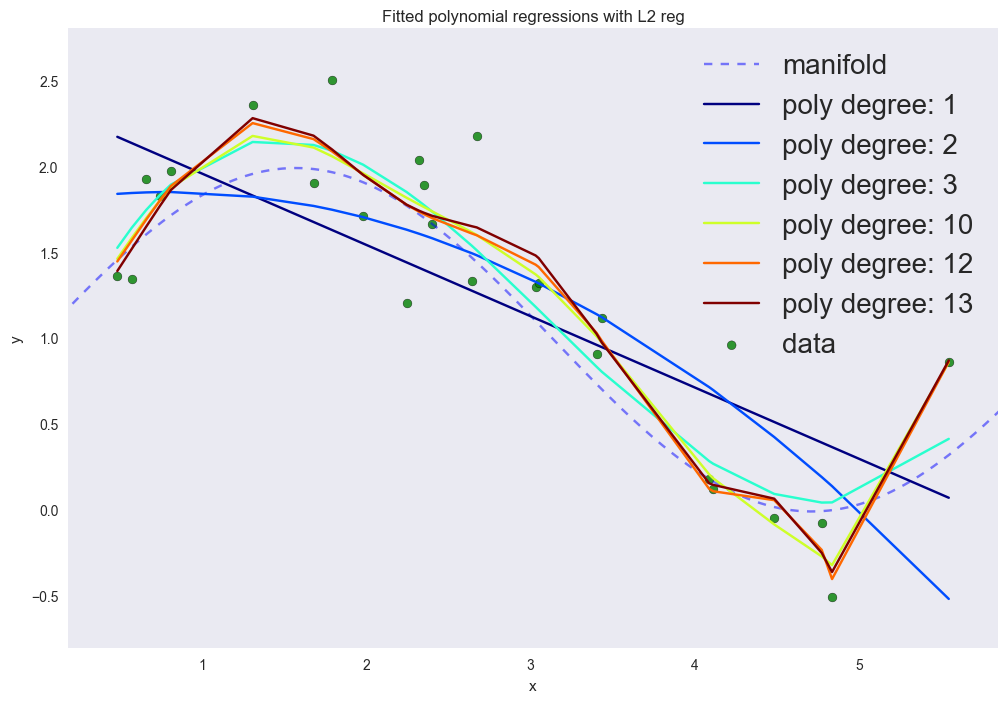

In [15]:
# define regularization parameter
lmbd = 0.1

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L2 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [16]:
for p, e in zip(degree_list, err):
    print p, e

1 0.267481153307
2 0.225467404472
3 0.0880322024172
10 0.058338514045
12 0.0558533769369
13 0.056386831979


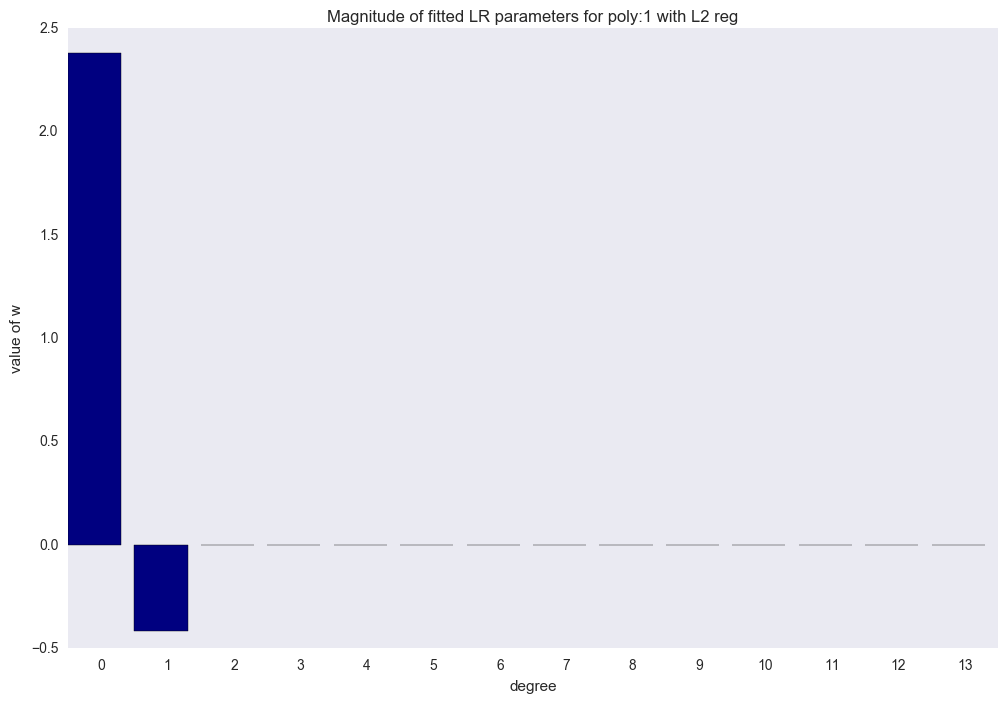

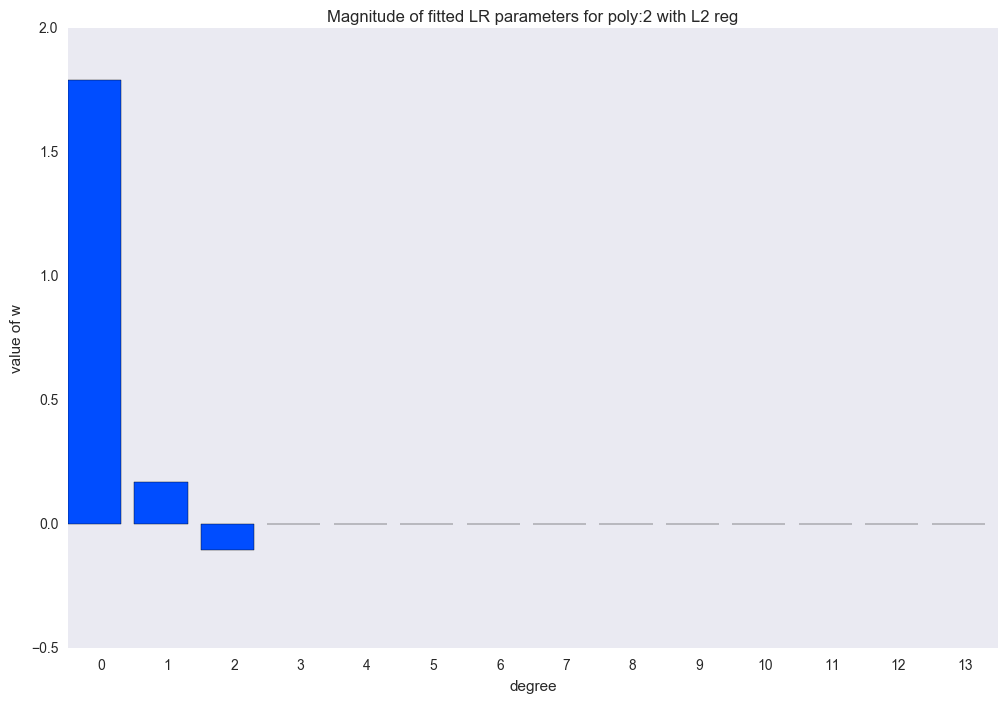

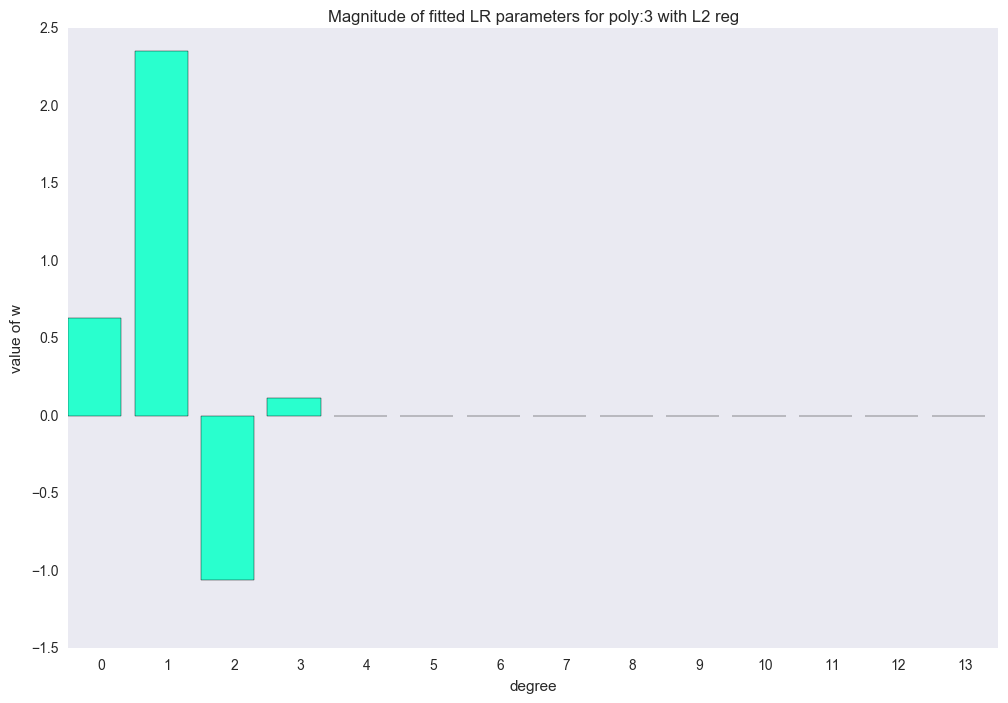

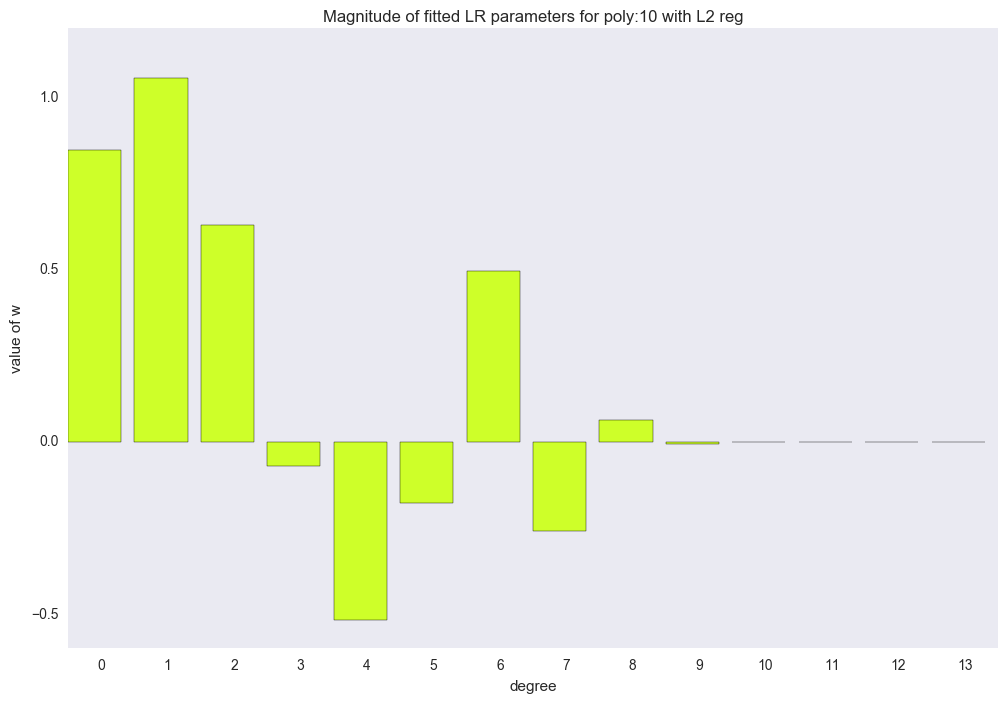

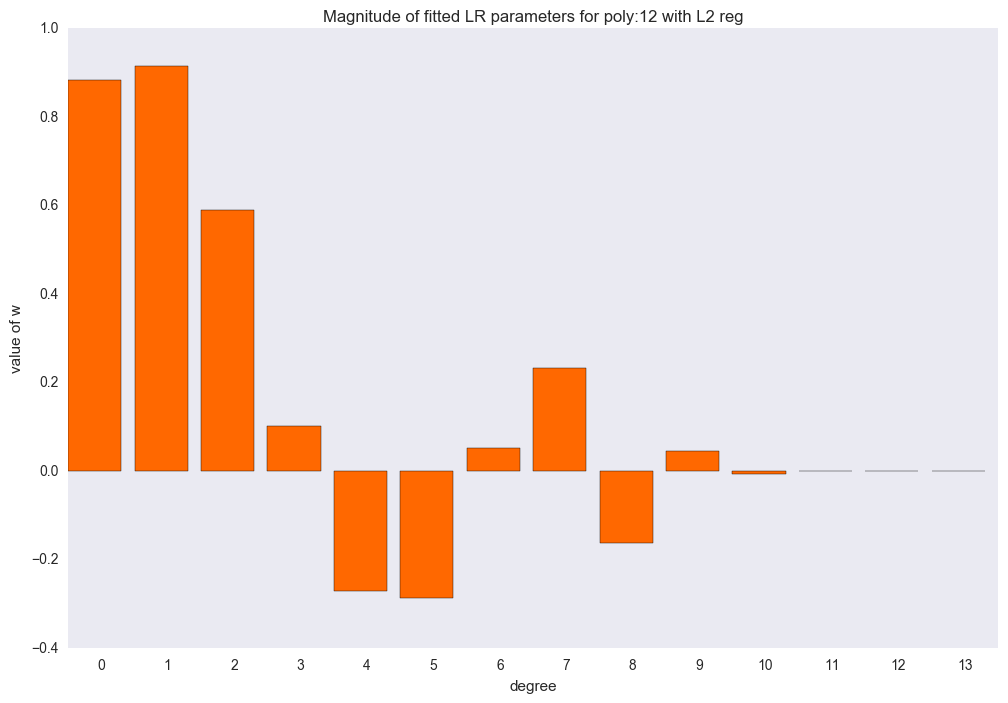

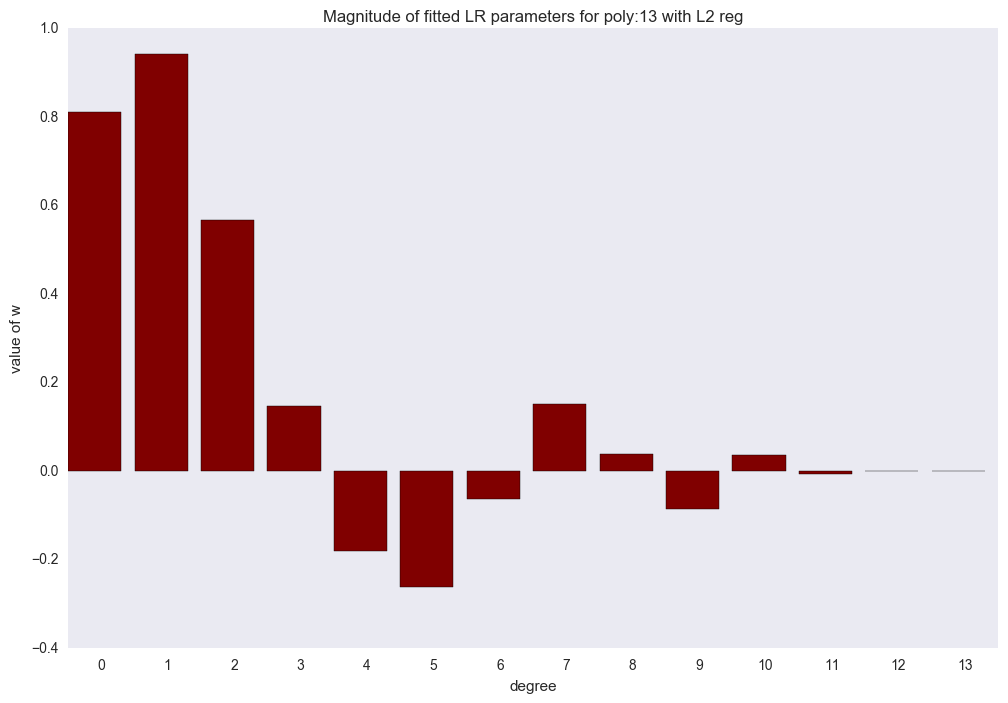

In [17]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L2 reg' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# $L_1$ регуляризация
<center>или LASSO (least absolute shrinkage and selection operator)</center>

Добавим ограничение на $L_1$ норму вектора параметров:

$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$

целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$

К сожалению, задача в этом виде не имеет общего аналитического решения, но мы можем воспользоваться методом градиентного спуска для поиска оптимального значения параметров модели:

$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$

Формула для итеративного обновления весов:
$$\large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
где:
* $\large \alpha$ - это скорость обучения или размер градиентного шага.

In [18]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T

# define MSE function to evaluate model
# we expect that durint training process this value will be decreasing
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.00000001
# we will keep all MSE values to plot graph
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print loss[-1]

1.3051230958e+38
1.21979102398e+58
1.14003816725e+78
1.06549974318e+98
9.95834819687e+117
9.30724755635e+137
8.69871743413e+157
8.12997446782e+177
7.59841727794e+197
7.10161456943e+217
6.63729401109e+237
6.20333184222e+257
5.79774315864e+277
5.41867283397e+297
inf
inf
inf
inf
inf
inf


# Стандардизация

Что бы избезать расхождения алгоритма градиентного спуска и выровнять амплитуду признаков мы можем привести все признаки к единому стандарту: что бы среднее значение признака было равно нулю, а дисперсия единице. Бля этого необлодимо из каждого признака вычесть свое среднее (по столбцу) и разрелить на стандартное отклонение. Параметры преобразования мы вычисляем на тренировочном наборе:

$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$

а применяем как к тренировочному, так и к тестовому:

$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

In [19]:
# import norm class from scipy
from scipy.stats import norm

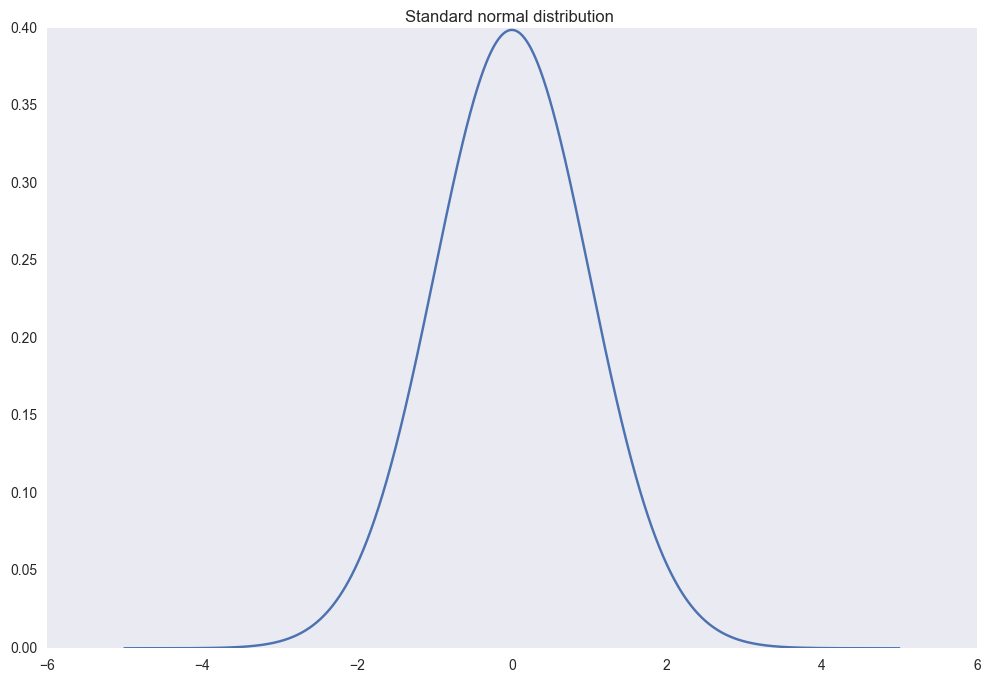

In [20]:
plt.plot(np.linspace(-5, 5, 1000), norm.pdf(np.linspace(-5, 5, 1000)))
plt.title('Standard normal distribution ')
plt.show()

X mean:
[  1.00000000e+00   2.61717625e+00   8.89178866e+00   3.46858633e+01
   1.47337824e+02   6.62964718e+02   3.10664370e+03   1.49946179e+04
   7.40097896e+04   3.71757450e+05   1.89408958e+06   9.76488362e+06
   5.08473839e+07   2.67042329e+08]
X std
[  0.00000000e+00   1.42904764e+00   8.26280332e+00   4.36295151e+01
   2.28694895e+02   1.20605446e+03   6.41842261e+03   3.44672461e+04
   1.86543640e+05   1.01602565e+06   5.56120143e+06   3.05530627e+07
   1.68325268e+08   9.29250585e+08]


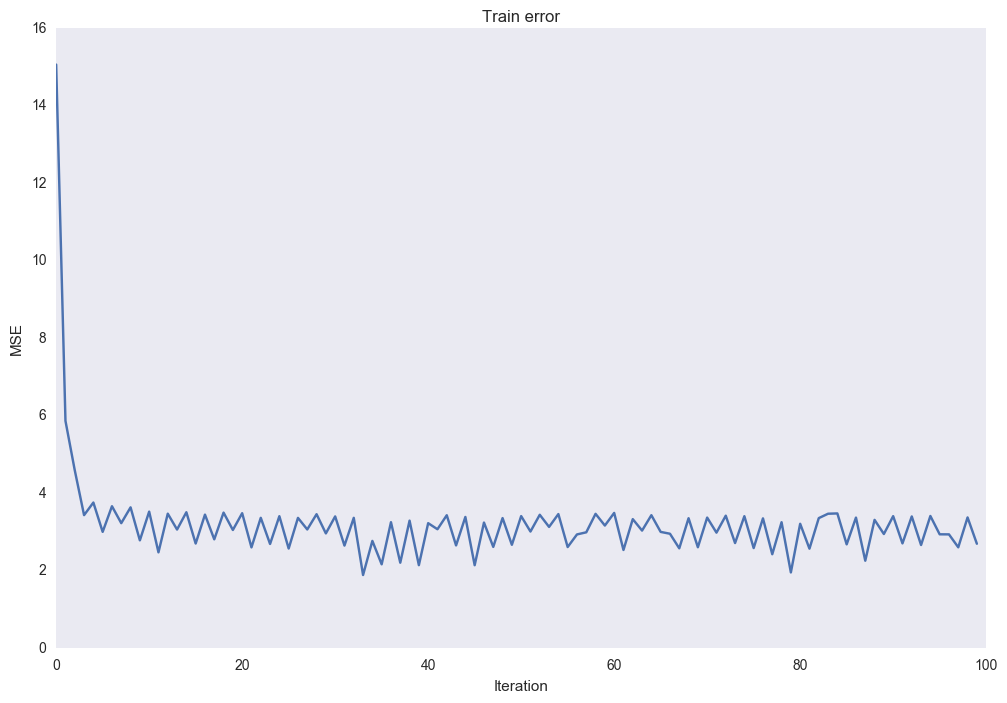

In [21]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T
# compute sample mean
x_mean = X.mean(axis=0)
print 'X mean:'
print x_mean
# compute sample std
x_std = X.std(axis=0)
print 'X std'
print x_std
# apply transformation
X = (X - x_mean)/x_std
# fix first column with ones
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

Причешем код $L_1$ регрессии:

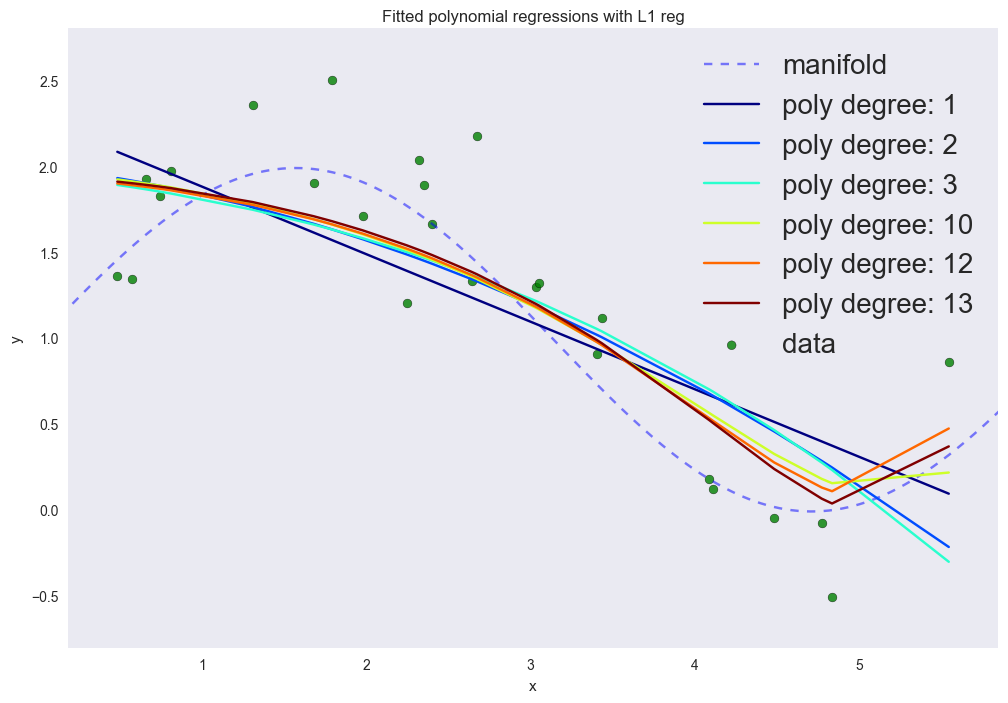

In [22]:
degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=0.05)
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L1 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [23]:
for p, e in zip(degree_list, err):
    print p, e

1 0.27204827363
2 0.237946243939
3 0.241180355496
10 0.180834198003
12 0.160690343444
13 0.154250545328


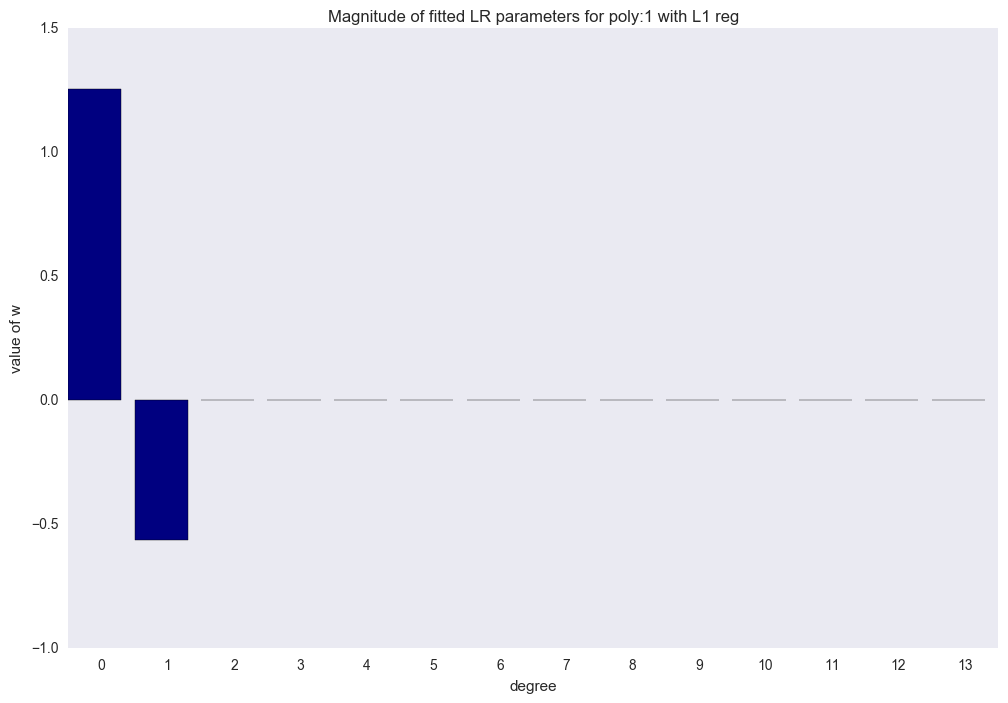

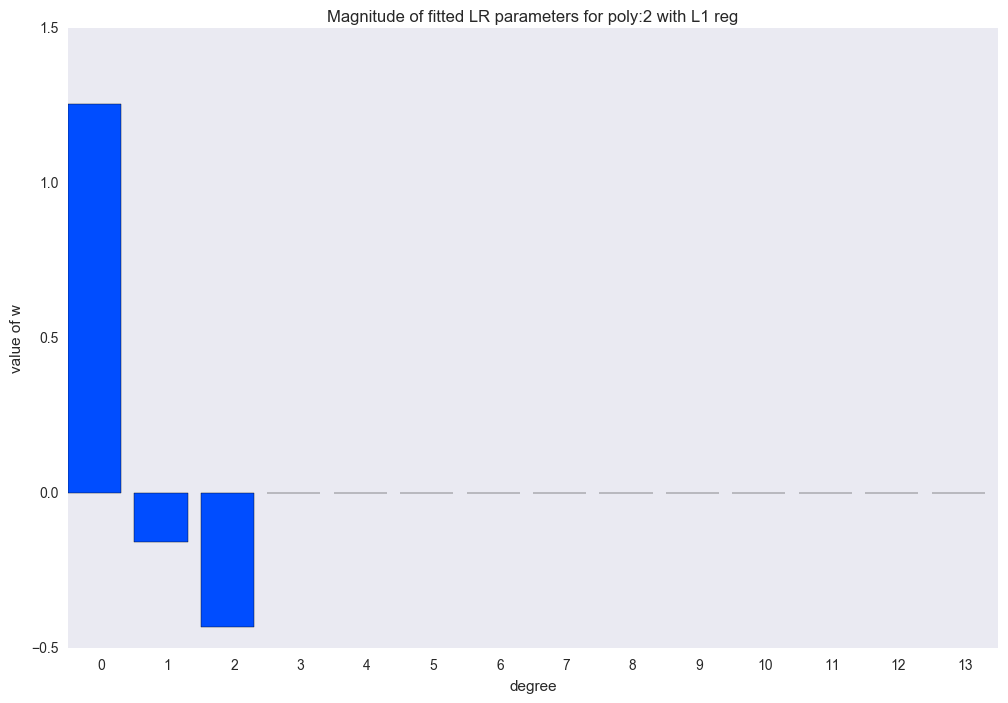

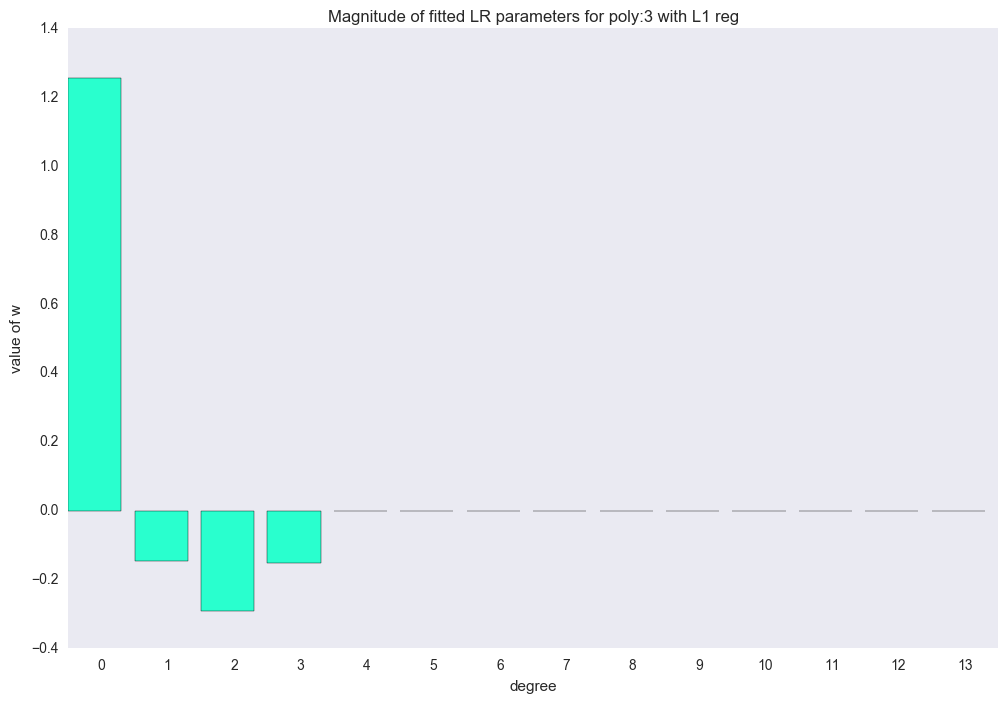

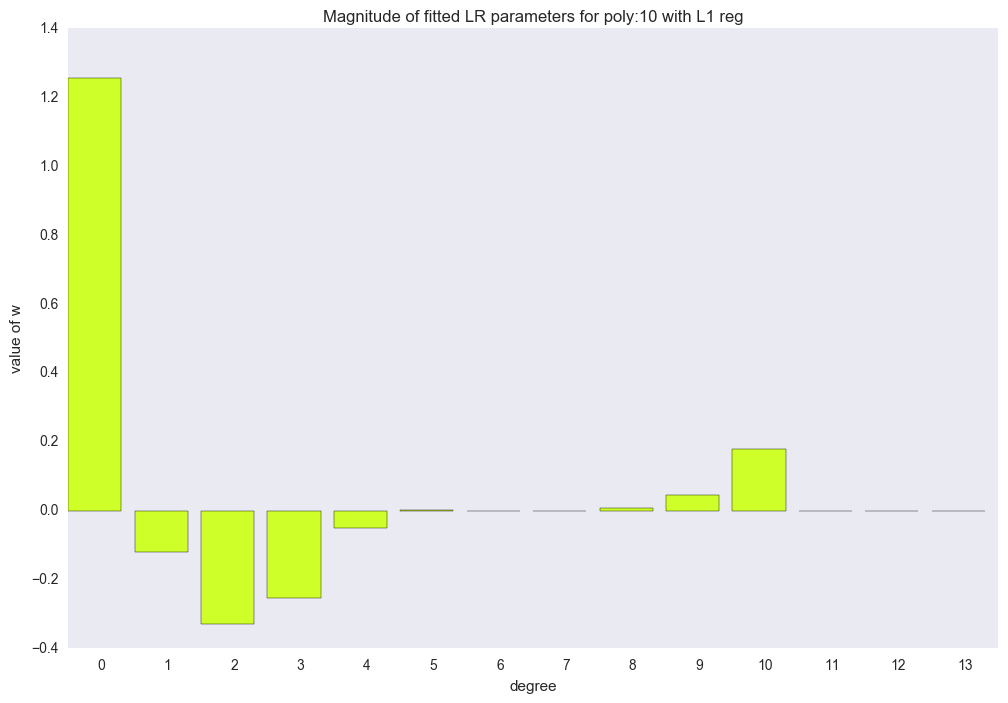

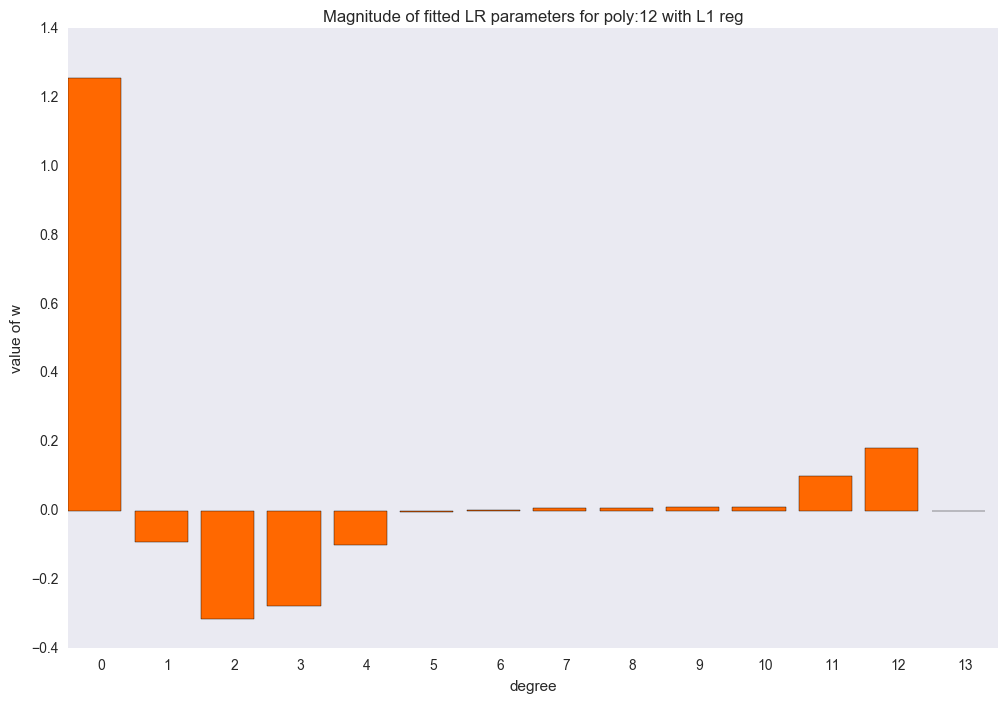

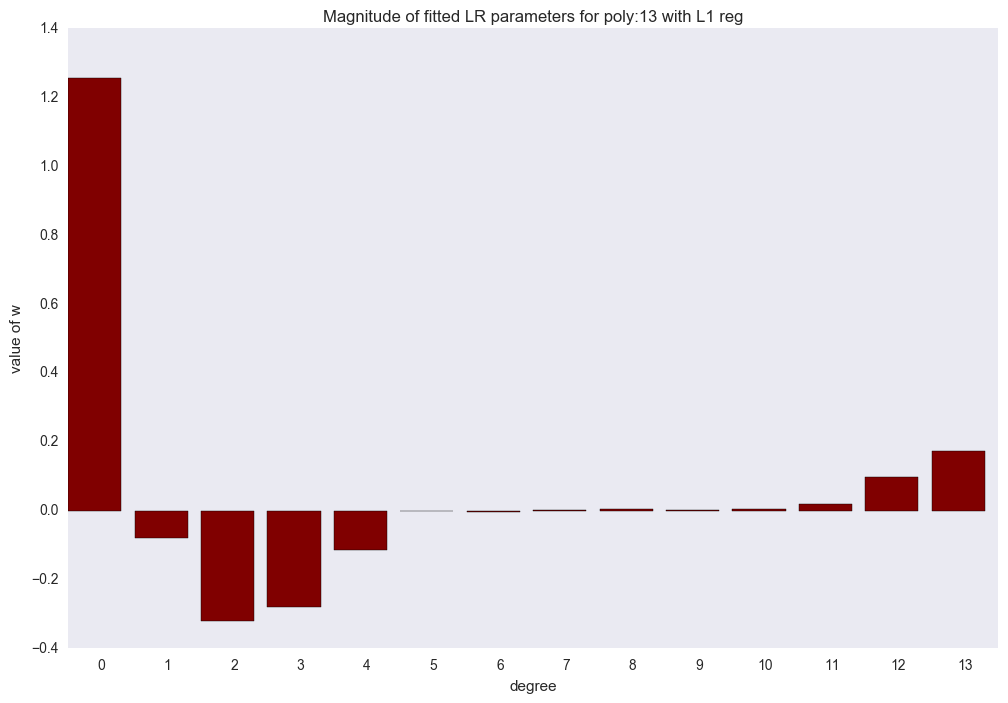

In [24]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L1 reg' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

![5fcv](images/sklearn-logo.png)

# Выбор модели

Внезапно регляризированная линейная регрессия стала содержать на один параметр больше:

$$\large \Theta = \left\{\vec{w}, \lambda\right\}$$

Еще печальнее, что мы не можем оптимизировать веса и параметр регуляризации одновременно. Обычно мы делим множество данных на три группы:

* тренировочный набор - на нем обучаются основные параметры модели;
* валидационный набор - на нем подбираются гипер-параметры;
* тестовый набор или отложенная выборка - на нем тестируется финальная модель, эти данные никогда не участвуют в обучении какого либо из параметров модели.

Возьмем один из стандартных датасетов из комплектации Sklearn http://scikit-learn.org/stable/datasets/ - цены на жилье в Бостоне.

In [25]:
# import dataset loader from sklearn
import sklearn.datasets

In [26]:
# load dataset
boston = sklearn.datasets.load_boston()
print 'Shape of the data:', boston.data.shape
data = {}

ix_test = np.random.choice(range(boston.data.shape[0]), size=200, replace=False)
ix_train = np.setdiff1d(range(boston.data.shape[0]), ix_test)
ix_cols = np.array([0, 2, 4, 5, 6, 7, 10, 11, 12])

# split in into train/test data
data['x_train'] = boston.data[ix_train, :][:, ix_cols]
data['x_test'] = boston.data[ix_test, :][:, ix_cols]
data['y_train'] = boston.target[ix_train]
data['y_test'] = boston.target[ix_test]

Shape of the data: (506, 13)


In [27]:
# lets look at head of the dataset
import pandas as pd
pd.DataFrame(boston.data[:, ix_cols], columns=boston.feature_names[ix_cols]).head()

,CRIM,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


Для дальнейшего эксперимента будет использована модель эластичной сети (ElasticNet) из <a href="http://scikit-learn.org/stable/modules/linear_model.html">пространства линейных моделей</a>, в которой используестя выпуклая комбинация $L_1$ и $L_2$ регуляризации.

ElasticNet:
$$\large \mathcal{L}\left(\Theta, X, \vec{y}\right) = \frac{1}{2n} \left\|X\vec{w} - \vec{y}\right\|_2^2 + \lambda \left( \gamma \left\|\vec{w}\right\|_1 + \frac{1}{2} \left(1 - \gamma\right) \left\|\vec{w}\right\|_2^2 \right)$$
где:
* $\lambda$ - это *alpha* в API Sklearn;
* $\gamma$ - это *l1_ratio* в API Sklearn.

In [28]:
# import ElasticNet from sklearn
from sklearn.linear_model import ElasticNet

In [29]:
# import MSE from sklearn
from sklearn.metrics import mean_squared_error

In [30]:
# http://scikit-learn.org/stable/modules/preprocessing.html
# StandardScaler do for us standardization of dataset
from sklearn.preprocessing import StandardScaler
# PolynomialFeatures calculate pilynomial features of the datase
from sklearn.preprocessing import PolynomialFeatures

Sklearn содержит несколько специальных интерфейсов для *трансформеров* и *моделей*. 
* Transformer:
    * fit
    * transform
    * fit_transform
* Model
    * fit
    * predict
    
Воспроизведем с помощью Sklearn один их экспериментов, описанных выше.

In [31]:
# degree of polynom
degree = 2
# hyperparameters of ElasticNet
alpha = 0.01
l1_ratio = 0.5

# craete instance of polynomial transformer
pf = PolynomialFeatures(degree=degree, include_bias=False)
# craete instance of standardize transformer
ss = StandardScaler()

# fit ss and pf on train set, then transform it
X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
print 'Shape of X_train after polynomial transformation:', X_train.shape
# transform test set using fitted ss and pf
X_test = ss.transform(pf.transform(data['x_test']))

# create instance of ElasticNet model
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
# fit the model on train set
model = model.fit(X_train, data['y_train'])
# predict target values for train set
y_hat_train = model.predict(X_train)
# predict target values for test set
y_hat_test = model.predict(X_test)

# calculate metrics for train/test
print 'Train error:', mean_squared_error(data['y_train'], y_hat_train)
print 'Test error:', mean_squared_error(data['y_test'], y_hat_test)

Shape of X_train after polynomial transformation: (306, 54)
Train error: 11.3291370955
Test error: 16.1348216156


/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Воспользуемся <a href="http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection">k-fold cross-valdation</a> для оценки ошибки на тестовом множестве. Пример 5-folds:
![5fcv](images/cv.png)

In [32]:
# import KFold from sklearn
from sklearn.model_selection import KFold

In [33]:
# create instance of 5-folder 
kf = KFold(n_splits=5, shuffle=True)

# performance of the model on train splits of train set
mse_train_folds = []
# performance of the model on validation splits of train set
mse_valid_folds = []
# iterate over splits
for ix_train, ix_valid in kf.split(X_train):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])
    # record MSE on train splits
    mse_train_folds.append(
        mean_squared_error(
            data['y_train'][ix_train], 
            model.predict(X_train[ix_train, :])))
    # record MSE on test splits
    mse_valid_folds.append(
        mean_squared_error(
            data['y_train'][ix_valid], 
            model.predict(X_train[ix_valid, :])))

# calculate average performance on splits
mse_train_folds = np.mean(mse_train_folds)
mse_valid_folds = np.mean(mse_valid_folds)

# train model on entire train set
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
model = model.fit(X_train, data['y_train'])
# make prediction usind the model
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print 'Train error on folds:', mse_train_folds
print 'Train error:', mean_squared_error(data['y_train'], y_hat_train)
print 'Valid error:', mse_valid_folds
print 'Test error:', mean_squared_error(data['y_test'], y_hat_test)

Train error on folds: 10.9100728289
Train error: 11.3291370955
Valid error: 16.1088237934
Test error: 16.1348216156


Видно, что ошибка на валирационном множестве является значительно более точной оценкой ошибки на тестовом множестве. Это дает нам возможность сравнивать различные модели не прибегая к использованию тестового множества. Ошибка в дизайне такого эксперимента критична и может стоить всего эксперимента, если допущена в самом начале.

Воспользуемся этой техникой, что бы найти оптимальную степень полиномиальной регрессии в эластичной сети.

In [34]:
# progress bars to visualize long job
from tqdm import tqdm_notebook


Best test score: 15.5019636776


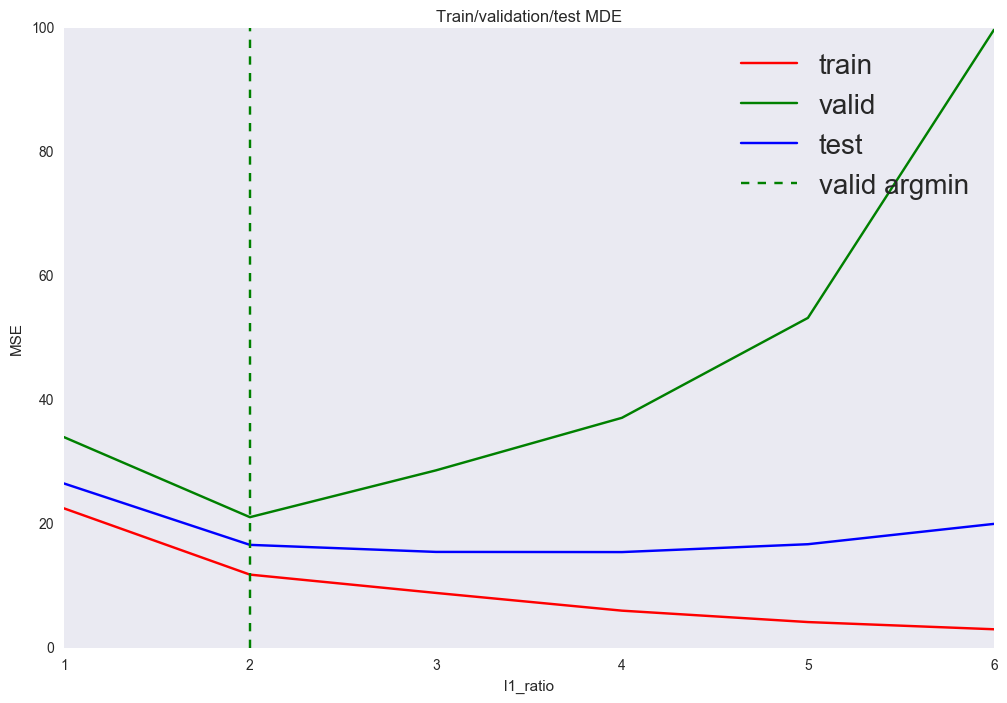

In [35]:
alpha = 0.01
l1_ratio = 0.01

kf = KFold(n_splits=5, shuffle=False)

mse_train = []
mse_valid = []
mse_test = []
# iterate through all values of L1 parameter and show progress bar
degree_list = range(1, 7)
for degree in tqdm_notebook(degree_list):
    pf = PolynomialFeatures(degree=degree, include_bias=False)
    ss = StandardScaler()
    X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
    X_test = ss.transform(pf.transform(data['x_test']))

    mse_valid_folds = []
    for ix_train, ix_valid in kf.split(X_train):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
        model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])
        mse_valid_folds.append(
            mean_squared_error(
                data['y_train'][ix_valid], 
                model.predict(X_train[ix_valid, :])))
    mse_valid.append(np.mean(mse_valid_folds))
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train, data['y_train'])
    mse_train.append(mean_squared_error(data['y_train'], model.predict(X_train)))
    mse_test.append(mean_squared_error(data['y_test'], model.predict(X_test)))
    

print 'Best test score:', np.min(mse_test)
    
plt.plot(degree_list, mse_train, c='r', label='train')
plt.plot(degree_list, np.array(mse_valid), c='g', label='valid')
plt.plot(degree_list, mse_test, c='b', label='test')

x = sorted(zip(degree_list, mse_valid), key=lambda t: t[1])[0][0]
plt.axvline(x, color='g', linestyle='--', label='valid argmin')

plt.legend(loc='upper right', prop={'size': 20})
plt.title('Train/validation/test MDE')
plt.xlabel('l1_ratio')
plt.ylabel('MSE')
plt.show()

Для поиска в параметров в большем пространстве параметров существует несколько вспомогательных классов:
- <a href="http://scikit-learn.org/stable/modules/pipeline.html">Pipeline</a>, который позволяет объединять несколько трансформеров и моделей в одну модель; например *полиномиальная трансформация* $\rightarrow$ *стандардизация* $\rightarrow$ *обучение модели*; новая модель обладает интерфейсом модели, т.н. реализует функции fit и predict (predict_proba);
- <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> сделан собственно для поиска оптимальных параметров (полный перебор в ограниченном пространстве гипотез); этот класс так же реализует интерфейс модели; финальная модель может быть обученна на всем тренировочном множестве, используя найденные оптимальные параметры.

In [36]:
# import Pipeline from sklearn
from sklearn.pipeline import Pipeline

In [37]:
# create pipe with three steps
pipe = Pipeline(steps=[
    ('pf', PolynomialFeatures(include_bias=False)),
    ('ss', StandardScaler()),
    ('en', ElasticNet())
])
pipe.named_steps

{'en': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'pf': PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [38]:
# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [39]:
parameters = {
    'pf__degree': [1, 2, 3],
    'en__alpha': [1e-6, 0.00001, 0.0001, 0.001, 0.01, 0.02, 0.04, 0.1, 0.5],
    'en__l1_ratio': [1e-6, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.9, 1]
}

for k, v in parameters.items():
    print k, v

pf__degree [1, 2, 3]
en__alpha [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.02, 0.04, 0.1, 0.5]
en__l1_ratio [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.9, 1]


In [40]:
# import helper function which converts metrics into score function for GridSearch
from sklearn.metrics import make_scorer

grid_search = GridSearchCV(pipe, parameters, cv=10, n_jobs=8, verbose=1)

grid_search = grid_search.fit(data['x_train'], data['y_train'])

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=8)]: Done 216 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 1716 tasks      | elapsed:   11.8s
[Parallel(n_jobs=8)]: Done 2430 out of 2430 | elapsed:   16.0s finished


In [41]:
print 'Best params:', grid_search.best_params_
print 'Test score:', mean_squared_error(data['y_test'], grid_search.predict(data['x_test']))

Best params: {'en__l1_ratio': 1, 'en__alpha': 0.1, 'pf__degree': 3}
Test score: 17.9902344646


# Байесова интерпретация линейной регрессии
![5fcv](images/bayes_app.png)

## Вспоминаем определения
* Совместная вероятность: $\large p\left(x, y\right)$ вероятность того, что обе случайные переменные лежат в одном промежутке или в множестве дискретных значений;

* Marginal probability: $\large p\left(x\right) = \sum_y p\left(x, y\right)$

* Условная вероятность: $\large p\left(x \mid y\right)$ это вероятность события $\large x$ при известно исходе события $\large y$; $\large p\left(x, y\right) = p\left(x \mid y\right) p\left(y\right) = p\left(y \mid x\right) p\left(x\right)$

* Теорема Байеса: $\large p\left(y \mid x\right) = \dfrac{p\left(x \mid y\right) p\left(y\right)}{p\left(x\right)} = \dfrac{p\left(x \mid y\right) p\left(y\right)}{\sum_{z} p\left(x \mid z\right) p\left(z\right)}$

* Независимость: $\large p\left(x, y\right) = p\left(x\right) p\left(y\right)$

## Simple example
* Допустим есть некоторый медицинский тест на страшную болезнь, точность которого 95% (ошибка I и II рода равновероятна);
* 1% популяции страдает этой страшной болезнью;
* некоторый человек сегодня получил положительный результат теста;
* какова вероятность того, что у этого человека реально есть страшная болезнь?

In [42]:
p_test = 0.95
p_prior = 0.01
p_disease = p_test*p_prior / (p_test*p_prior + (1 - p_test)*(1 - p_prior))
print 'Answer is %2.2f%%' % (p_disease*100)

Answer is 16.10%


$$\Large \color{green}{p\left(y \mid x\right)} = \dfrac{\color{orange}{p\left(x \mid y\right)} \color{blue}{p\left(y\right)}}{\color{red}{p\left(x\right)}}$$
where:
* $\large \color{blue}{p\left(y\right)}$ 
    * Априорная вероятность: веростность гипотезы *до того*, как мы получили данные;
* $\large \color{orange}{p\left(x \mid y\right)}$ 
    * Правдоподобие: вероятность данных при условии, что гипотеза верна;
* $\large \color{red}{p\left(x\right) = \sum_{z} p\left(x \mid z\right) p\left(z\right)}$ 
    * Marginal: вероятность данных с учетом всевозможных гипотез;
* $\large \color{green}{p\left(y \mid x\right)}$ 
    * Апостериорная вероятность: вероятность гипотезы *после* наблюдения данных.
    
В статистике мы обычно ищем гипотезу *максимального правдоподобия*:
$$\large \theta_{\text{ML}} = \arg \max_{\theta} p\left(D \mid \theta\right)$$

В байесовском подходе мы обычно ищем *апостериорное распределение*:

$$\large p\left(\theta \mid D \right) \propto p\left(D \mid \theta\right) p\left( \theta \right)$$

и гипотезу *апостериорного максимума*:

$$\large \theta_{\text{MAP}} = \arg \max_{\theta} p\left(\theta \mid D\right) = \arg \max_{\theta} p\left( D \mid \theta\right) p\left(\theta\right)$$

Расспотрим нормальное распределение (Гауссово), которое естественно возникает в широком классе задач реального мира (см. ЦПТ и ЗБЧ):

$$\large p\left(x \mid \mu, \sigma\right) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\dfrac{\left(x - \mu\right)^2}{2\sigma^2}}$$

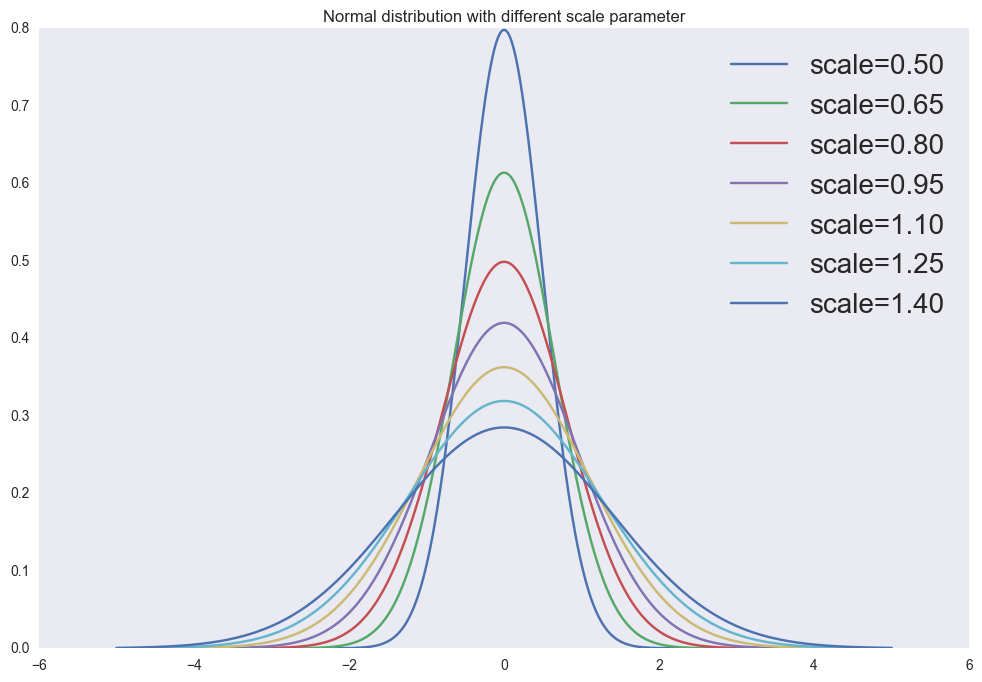

In [43]:
x = np.linspace(-5, 5, 1000)
for scale in np.linspace(0.5, 1.4, 7):
    plt.plot(x, norm.pdf(x, scale=scale), label='scale=%0.2f' % scale)
    
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Normal distribution with different scale parameter')
plt.show()

Если примеры в наборе данных $\large D = \left\{x_i\right\}_{i=1,\ldots,n}$ независимы и одинаково распределены, тогда можно записать правдоподобие набора данных:

$$\large \begin{array}{rcl} L = p\left(x_1, \ldots, x_n \mid \mu, \sigma\right) &=& \prod_{i=1}^n p\left(x_i \mid \mu, \sigma \right) \\
&=& \prod_{i=1}^n \frac{1}{\left(\sigma\sqrt{2\pi}\right)^n} e^{-\frac{\left(x_i - \mu\right)^2}{2\sigma^2}} \\
&=& \frac{1}{\left(\sigma\sqrt{2\pi}\right)^n} e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n \left(x_i - \mu\right)^2}
\end{array}$$

## Вернемся к линейной регрессии
Допустим, что истинное значение целевой переменной состоит из некоторой детерминированной функции, пусть линейной от признаков, и некоторого нормально распределенного шума:

$$\large y = \vec{w}^T \vec{x} + \epsilon, \epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$$

что тоже самое, что и:

$$\large p\left(y \mid \vec{x}, \vec{w}, \sigma^2\right) = \mathcal{N}\left(y \mid \vec{w}^T \vec{x}, \sigma^2\right)$$

тогда правдоподобие:
$$\large p\left(\vec{y} \mid X, \vec{w}, \sigma^2\right) = \prod_{i=1}^n \mathcal{N}\left(y_i \mid \vec{w}^T \vec{x}_i, \sigma^2\right)$$

применим логарифмическое преобразование, что сильно упростит нам жизнь:
$$\large \begin{array}{rcl}\mathcal{L} &=& \ln p\left(\vec{y} \mid X, \vec{w}, \sigma^2\right) \\
&=& \ln \prod_{i=1}^n \mathcal{N}\left(y_i \mid \vec{w}^T \vec{x}_i, \sigma^2\right) \\
&=& \ln \frac{1}{\left(\sigma \sqrt{2\pi}\right)^n} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2} \\
&=& -\frac{n}{2}\ln 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2
\end{array}$$

Предположим, что $\large \sigma = 1$, тогда гипотеза максимального правдоподобия полностью совпадает с МНК решением линейной регресси. Единственное отличие в том, что мы максимизируем $\large \mathcal{L}$, но со знаком минус.

Проиллюстируем это решение.

In [44]:
# provides tools for iterating
import itertools as it
# import color maps from matlpotlib
from matplotlib import cm

In [45]:
# prepare data
data = generate_wave_set(1000, 100)
X = np.vstack((np.ones(data['x_train'].shape[0]), data['x_train'])).T

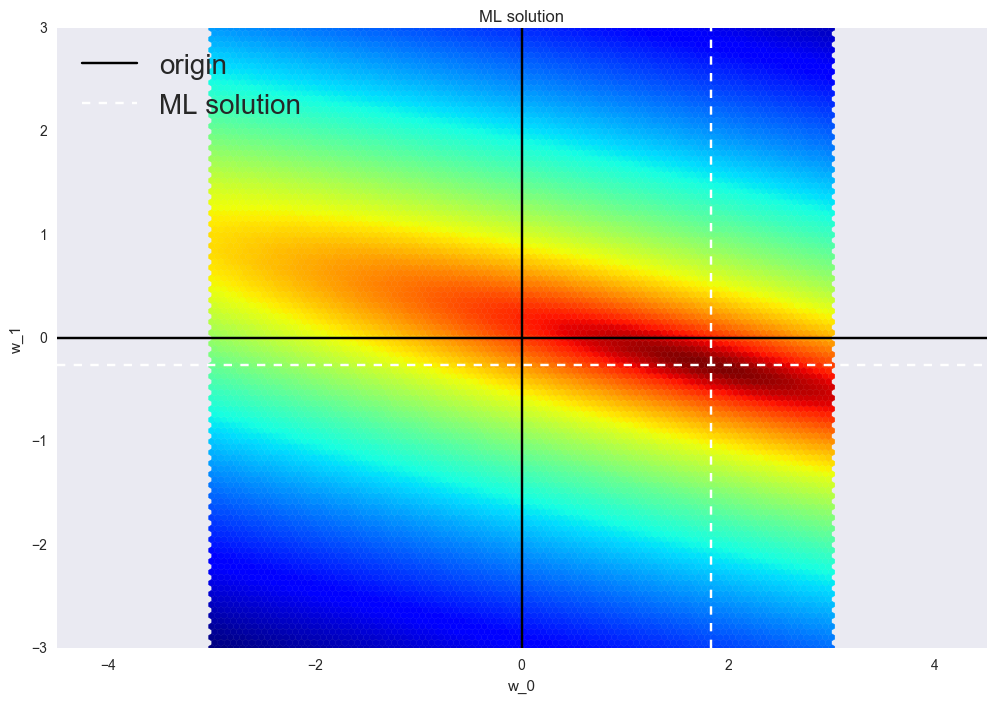

In [46]:
# find ML estimation
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

# plot
# prepare value space for different values of parameters of the model
w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
# create cartesian product of parameters
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
# calculate MSE on dataset for each pairs of parameters
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)


plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')
plt.axes().set_aspect('equal', 'datalim')
plt.title('ML solution')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

На самом деле априорные вероятности были неявно заданы и были равновероятны (равномерное распределение). Зададим такое априорное распределение на параметры модели, что бы одни значения $\large \vec{w}$ были более вероятны чем другие. Воспользуемся нормальным распределением: $\large p\left(\vec{w}\right) = \mathcal{N}\left(\vec{w} \mid 0, \sigma_0^2 E\right)$

Апостериорное распределение тогда будет пропорционально следующему выражению:
$$\large p\left(\vec{y} \mid X, \vec{w}, \sigma^2\right) \propto \mathcal{N}\left(\vec{w} \mid 0, \sigma_0^2 E\right) \prod_{i=1}^n \mathcal{N}\left(y_i \mid \vec{w}^T \vec{x}_i, \sigma^2\right)$$

И опять, после логарифмичесткого преобразования мы получаем ровно то же решение, что и при $L_2$ регуляризации. По мимо этого мы получаем интерпретацию параметра регуляризации $\large \lambda = \frac{1}{2\sigma_0^2}$: чем больше параметр, тем меньше дисперсия априорного распределения и тем сильнее значения параметров модели будут сконцентрированы вокруг среднего значения.

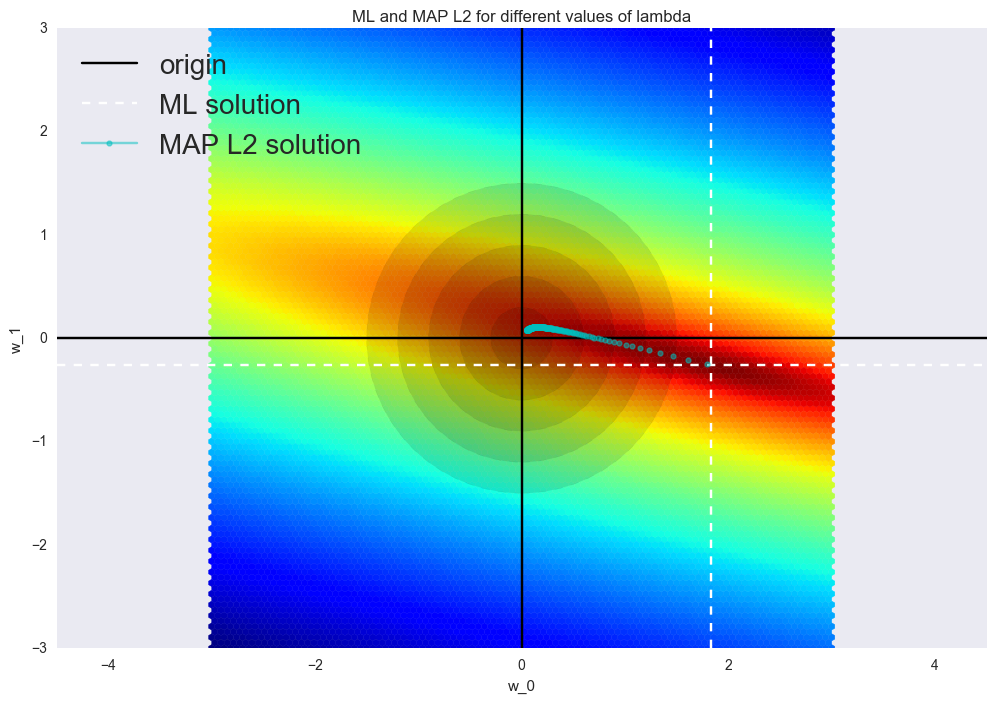

In [47]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

# solve L2 problems for different values of 
w_l2 = {}
lmbd_space = np.linspace(0.5, 1500, 500)
for lmbd in lmbd_space:
    w_l2[lmbd] = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    
w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)


plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
# plot prior distribution of parameters
for i in range(1, 6):
    plt.gcf().gca().add_artist(plt.Circle((0, 0), i*0.3, color='black', linestyle='--', alpha=0.1))
plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')
# plot MAP solutions
flag = True
for _, w_l2_solution in w_l2.items():
    plt.plot(w_l2_solution[0], w_l2_solution[1], color='c', marker='.', mew=1, alpha=0.5, 
             label='MAP L2 solution' if flag else None)
    flag = False
plt.axes().set_aspect('equal', 'datalim')
plt.title('ML and MAP L2 for different values of lambda')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

Попробуем заменить нормальное априорное распределение другим, например распределением Лапласа (симметричное экспоненциальное распределение):

$$\large p\left(x \mid \mu, \beta\right) = \frac{1}{2\beta} e^{-\dfrac{\left|x - \mu\right|}{\beta}}$$

In [48]:
from scipy.stats import laplace

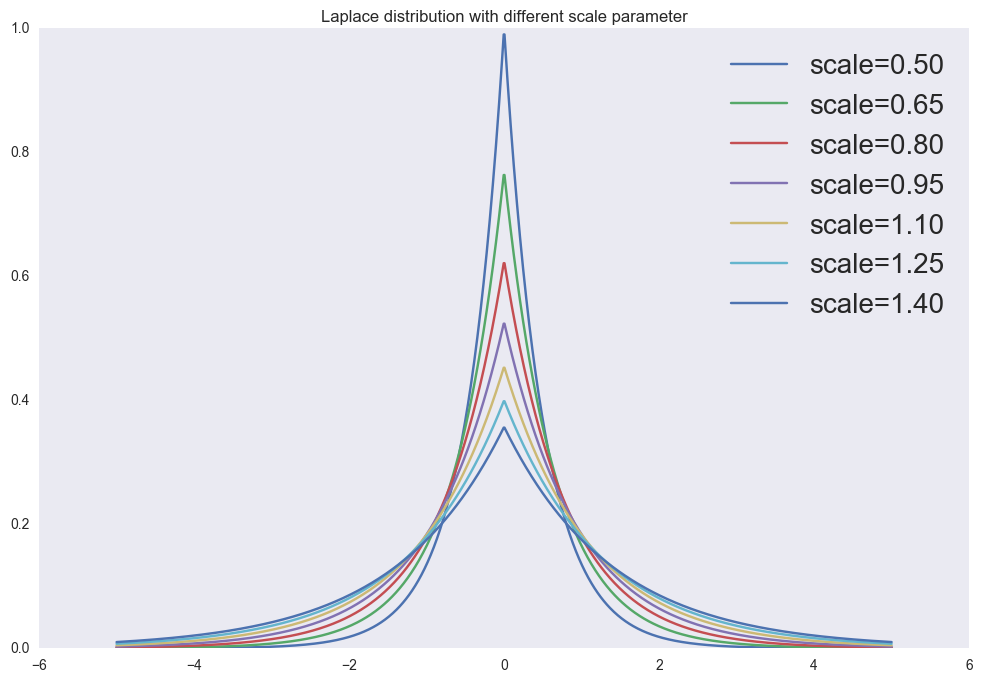

In [49]:
x = np.linspace(-5, 5, 1000)
for scale in np.linspace(0.5, 1.4, 7):
    plt.plot(x, laplace.pdf(x, scale=scale), label='scale=%0.2f' % scale)
    
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Laplace distribution with different scale parameter')
plt.show()

С новып априорным распреелением на параметры: $\large p\left(\vec{w}\right) = \text{Laplace}\left(\vec{w} \mid 0, \beta E\right)$

апостериорное распределение пропорционально следующему выражению:
$$\large p\left(\vec{y} \mid X, \vec{w}, \sigma^2\right) \propto \text{Laplace}\left(\vec{w} \mid 0, \beta\right) \prod_{i=1}^n \mathcal{N}\left(y_i \mid \vec{w}^T \vec{x}_i, \sigma^2\right)$$

Внезапно мы опять получаем в точности $L_1$ регуляризацию и интерпретацию параметра регуляризации: $\large \lambda = \frac{1}{\beta}$.

In [50]:
w_l1 = {}
lmbd_space = np.linspace(0.001, 2, 200)
for lmbd in tqdm_notebook(lmbd_space):
    w_l1[lmbd] = fit_lr_l1(X, data['y_train'], lmbd, n_iter=10000, lr=0.001)[0]

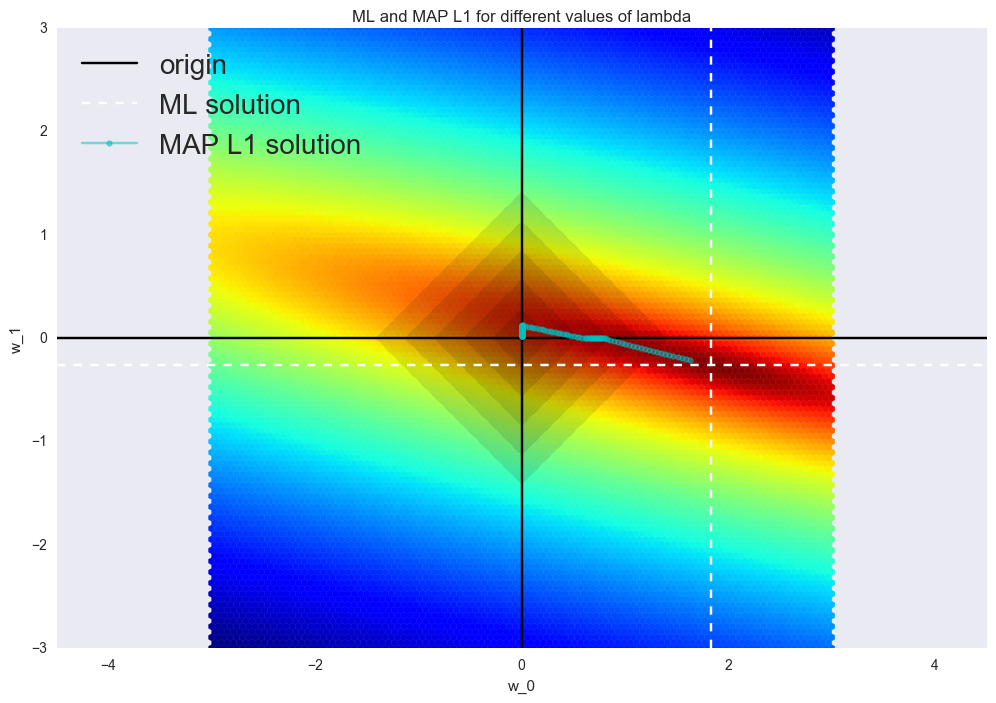

In [51]:
w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)


plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')

# function to plot rhomb
def plot_rhomb(cx=0, cy=0, r=0.5):
    plt.gcf().gca().add_artist(plt.Rectangle((cx, cy - np.sqrt(2*r**2)), 2*r, 2*r, angle=45, 
                                             color='black', linestyle='--', alpha=0.1))
# plot Laplace distribution density
for i in range(1, 6):
    plot_rhomb(r=0.2*i)
plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')
# plot MAP solutions
flag = True
for _, w_l1_solution in w_l1.items():
    plt.plot(w_l1_solution[0], w_l1_solution[1], color='c', marker='.', mew=1, alpha=0.5, 
             label='MAP L1 solution' if flag else None)
    flag = False

plt.axes().set_aspect('equal', 'datalim')
plt.title('ML and MAP L1 for different values of lambda')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

Можно заметить, что решения получабтся разреженные. Этот же эффект можно проиллюстрировать следующим образом.

In [52]:
# lets load again Boston dataset
boston = sklearn.datasets.load_boston()
print 'Shape of the data:', boston.data.shape
data = {}
data['x_train'] = boston.data
data['y_train'] = boston.target
data['x_train'] = StandardScaler().fit_transform(data['x_train'])

Shape of the data: (506, 13)


In [53]:
# solve LR L1 for fifty lambdas from 0 to 1.5
lmbd_space = np.linspace(0, 1.5, 50)

res = []
for lmbd in tqdm_notebook(lmbd_space):
    res.append(fit_lr_l1(np.hstack((np.ones(data['x_train'].shape[0])[:, np.newaxis], data['x_train'])), 
                         data['y_train'], lmbd=lmbd, n_iter=10000, lr=0.001)[0])
res = np.array(res)

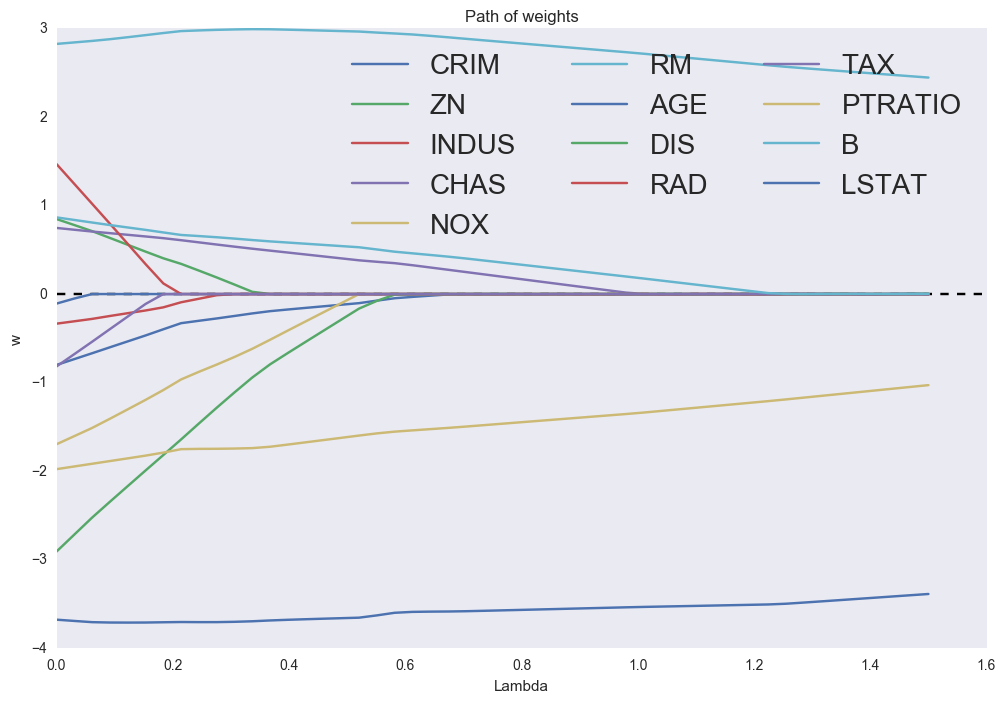

In [54]:
plt.axhline(0, color='black', linestyle='--')

for i in range(1, res.shape[1]):
    plt.plot(lmbd_space, res[:, i], label=boston.feature_names[i - 1])
    
plt.title('Path of weights')
plt.xlabel('Lambda')
plt.ylabel('w')
plt.legend(loc='upper right', prop={'size': 20}, ncol=3)
plt.show()

1. CRIM: per capita crime rate by town 
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
* INDUS: proportion of non-retail business acres per town 
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
* NOX: nitric oxides concentration (parts per 10 million) 
* RM: average number of rooms per dwelling 
* AGE: proportion of owner-occupied units built prior to 1940 
* DIS: weighted distances to five Boston employment centres 
* RAD: index of accessibility to radial highways 
* TAX: full-value property-tax rate per 10000\$
* PTRATIO: pupil-teacher ratio by town 
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
* LSTAT: % lower status of the population 
* MEDV: Median value of owner-occupied homes in $1000's

Обобщением приведенных приведенных регуляризаторов является ограничение по $\large \mathscr{l}^\mathcal{p}$ норме:

$$\large \left\|x\right\|_p = \left( \sum_{i=1}^\infty \left|x\right|^p \right)^{\frac{1}{p}}$$

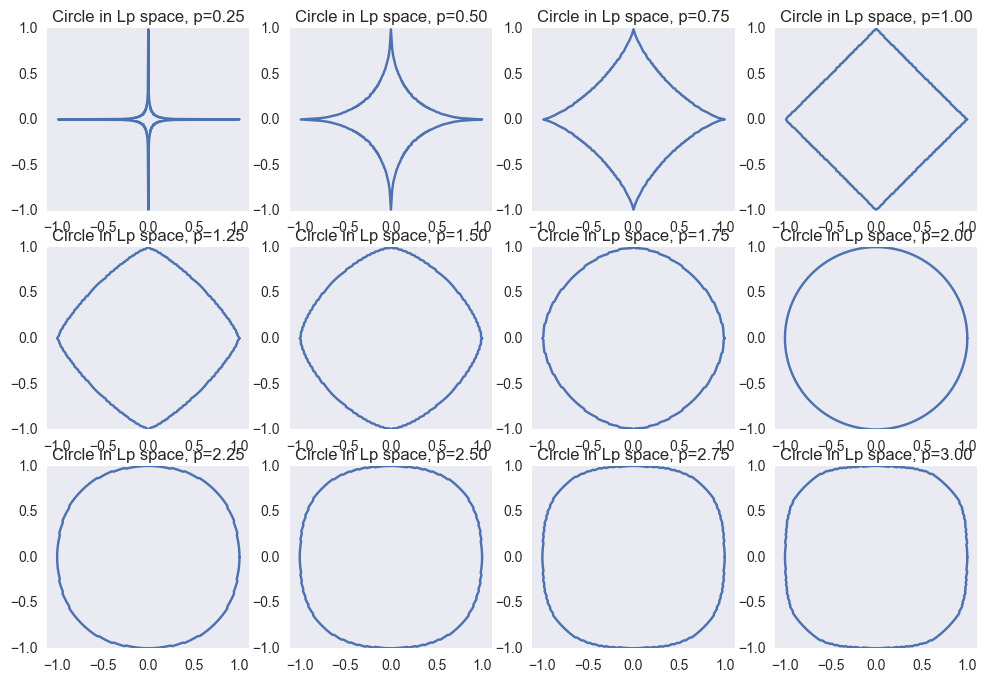

In [55]:
f, ax = plt.subplots(3, 4)
ax = reduce(lambda a, b: a + b, ax.tolist())

a_list = np.linspace(0, 2*np.pi, 361)
r_list = np.linspace(0, 1.1, 100)

for ix, p in enumerate(np.linspace(0.25, 3, 12)):
    points = []
    for a in a_list:
        r_inner = []
        for r in r_list:
            if np.linalg.norm([r*np.cos(a), r*np.sin(a)], p) > 1:
                break
            r_inner.append(r)
        r = max(r_inner)
        points.append([r*np.cos(a), r*np.sin(a)])
    points = np.array(points)
    
    ax[ix].plot(points[:, 0], points[:, 1])
    ax[ix].set_aspect('equal', 'datalim')
    ax[ix].set_title('Circle in Lp space, p=%0.2f' % p)

Или же, что тоже самое, использование обобщенного нормального распределения в качестве априорного на параметры:

$$\large p\left(x \mid \alpha, \beta, \mu\right) = \frac{\beta}{2\alpha \Gamma\left(\frac{1}{\beta}\right)} e^{-\left(\frac{\left|x - \mu\right|}{\alpha}\right)^\beta}$$

In [56]:
from scipy.stats import gennorm

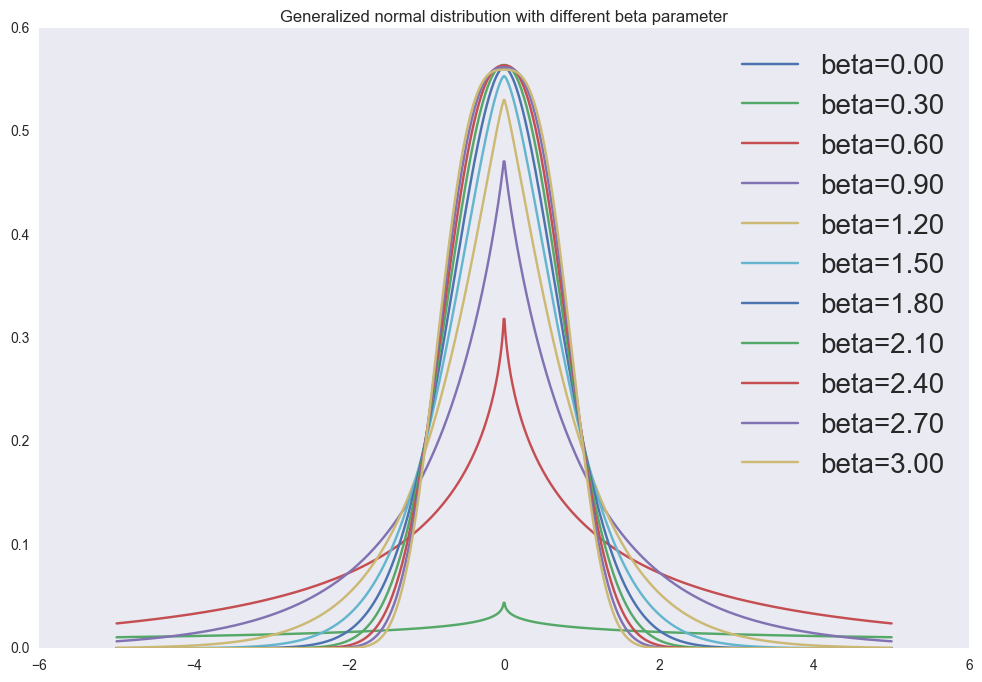

In [57]:
x = np.linspace(-5, 5, 1000)
for beta in np.linspace(0, 3, 11):
    plt.plot(x, gennorm.pdf(x, beta=beta), label='beta=%0.2f' % beta)
    
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Generalized normal distribution with different beta parameter')
plt.show()

# Логистическая регрессия

Рассмотрим задачу классификации на два класса. Используя теорему Байеса мы можем записать вероятность класса при заданных признаках (для простоты допустим признак всего один):

$$\large \begin{array}{rcl} p\left(c = 0 \mid x \right) &=& \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)}{p\left(x \mid c = 0\right) p\left(c = 0\right) + p\left(x \mid c = 1\right) p\left(c = 1\right)} \\
&=& \frac{1}{1 + e^{-a}} = \sigma\left(a\right)
\end{array}$$

где:
$$\large a = \ln \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)}{p\left(x \mid c = 1\right) p\left(c = 1\right)}$$
$\large a$ называется отношением вероятностей.

Допустим, что признаки внутри классов распределены нормально со своим средним и дисперсией:
$$\large p\left( x \mid c = k \right) \sim \mathcal{N}\left( \mu_k, \sigma \right)$$

а так же, для начала, допустим, что классы равновероятны:
$$\large \begin{array}{rcl} a &=& \ln \frac{p\left(x \mid c = 0\right)}{p\left(x \mid c = 1\right)} \\
&=& \ln p\left(x \mid c = 0\right) - \ln p\left(x \mid c = 1\right)\\
&=& \frac{1}{2\sigma^2} \left(\mu_1 - x\right)^2 -\frac{1}{2\sigma^2} \left(\mu_0 - x\right)^2 \\
&=& \frac{1}{2\sigma^2} \left(\left(\mu_1 - x\right)^2 - \left(\mu_0 - x\right)^2\right) \\
&=& \frac{1}{2\sigma^2} \left(\mu_1^2 - 2\mu_1 x + x^2 - \mu_0^2 + 2 \mu_0 x - x^2\right) \\
&=& \frac{\mu_1^2 - \mu_0^2}{2\sigma^2} + \frac{\mu_0 - 2\mu_1}{\sigma^2}x \\
&=& w_0 + w_1 x\\
\end{array}$$

Получается, что функция логистического сигмоида от линейной комбинации признаков и параметров естественно всплывает при предположении о нормальности признаков внутри класса.

*Логистическая регрессия* - это модель, где параметры линейной функции $\large \vec{w}$ оптимизируются напрямую.

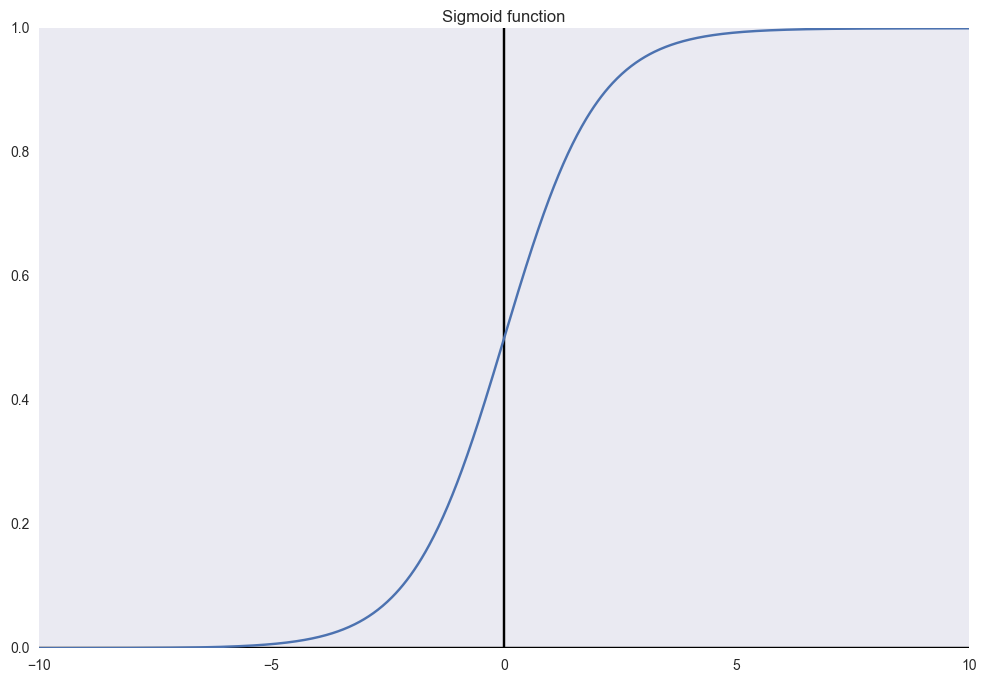

In [58]:
# define scalar function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# make vectorized function from scalar
sigmoid = np.vectorize(sigmoid)

x = np.linspace(-10, 10, 1000)

plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
plt.plot(x, sigmoid(x))
plt.title('Sigmoid function')
plt.show()

Интересной особеностью сигмоида является то, что его производная выражается через значение самого себя:

$$\large \frac{\partial \sigma\left(x\right)}{\partial x} = \sigma\left(x\right) \left(1 - \sigma\left(x\right)\right)$$

Вспомним распределение Бернулли - это распределение случайной величины, которая принимает значение $1$ с вероятностью $\large p$, и значение $0$ с вероятностью $\large q = 1 - p$:
$$\large p\left(k \mid p\right) = p^k \left(1 - p\right)^{1 - k}$$

Короткий пример: монетку подкинули $\large n + m$ раз, $\large n$ раз выпал орел и $\large m$ раз решка. Найдем оценку максимального правдоподобия вероятности выпадения орла $\large p(\text{head}) = p$

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln p^n \left(1 - p\right)^m \\
\frac{\partial \mathcal{L}}{\partial p} &=& \frac{n}{p} - \frac{m}{1 - p} \\
\frac{\partial \mathcal{L}}{\partial p} = 0 &\Leftrightarrow& \frac{n}{p} = \frac{m}{1 - p} \\
&\Leftrightarrow& p = \frac{n}{n + m}
\end{array}$$

Сделаем тоже самое для набора данных $\large D = \left\{\left(\vec{x}_i, y_i\right)\right\}_{i=1,\ldots,n}$, $\large \forall i, y_i \in \left\{0, 1\right\}$, тогда правдоподобие набора:

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln \prod_{i=1}^n p\left(c = 0 \mid \vec{x}_i \right)^{y_i} \left(1 - p\left(c = 0 \mid \vec{x}_i \right)\right)^{1 - y_i} \\
&=& \ln \prod_{i=1}^n \sigma\left(\vec{w}^T \vec{x}_i\right)^{y_i} \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)^{1 - y_i} \\
&=& \sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)
\end{array}$$

Найдем формулу обновления весов логистической регрессии для градиентного спуска:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}}\sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right) \\
&=& \sum_{i=1}^n y_i \frac{1}{\sigma} \sigma \left(1 - \sigma\right) \vec{x}_i + \left(1 - y_i\right) \frac{1}{1 - \sigma} \left(-1\right)\sigma \left(1 - \sigma\right) \vec{x}_i \\
&=& \sum_{i=1}^n y_i \left(1 - \sigma\right) \vec{x}_i - \left(1 - y_i\right) \sigma \vec{x}_i \\
&=& \sum_{i=1}^n \vec{x}_i \left(y_i - \sigma\right)
\end{array}$$

# Похоже все

![5fcv](images/sklearn.png)